In [1]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
from utils import *

import json
import os



/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
%pip install -q --proxy http://proxy:80 weasyprint

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset="LaMelo"
test_name_baseline="T2_5"
test_name="T4_5"
main_path="/home/woody/iwb3/iwb3021h/THESIS_RESULTS"
num_generations=3

# Total results

In [3]:
import json
datasets=["LaMelo","Gutenberg", "Adaline", "Sadie","Caitie", "Mateo","Chester"]
tests_completed=["T0_Proxy/seed_1","T0_Proxy/seed_2", "T0_Proxy/seed_3",
                 "T0+_Proxy/seed_1","T0+_Proxy/seed_2", "T0+_Proxy/seed_3",
                 
                 "T0_Basic/seed_1","T0_Basic/seed_2","T0_Basic/seed_3",
                 "T0+_Basic/seed_1","T0+_Basic/seed_2","T0+_Basic/seed_3",
                 
                 "T0_AutoAugment/seed_1", "T0_AutoAugment/seed_2", "T0_AutoAugment/seed_3",
                 
                 "T0_Resnet_10/seed_1","T0_Resnet_20/seed_2",
                 
                 "T1_Proxy/seed_1", "T1_Proxy/seed_2", "T1_Proxy/seed_3",
                 
                 "T2_Proxy/seed_1","T2_Proxy/seed_2","T2_Proxy/seed_3",
                 
                 "T3_Proxy/seed_1","T3_Proxy/seed_2", "T3_Proxy/seed_3",
                 
                 "T4_Proxy/seed_1","T4_Proxy/seed_2", "T4_Proxy/seed_3",
                 
                 "T6_Proxy/seed_1","T6_Proxy/seed_2", "T6_Proxy/seed_3",
                 "T6+_Proxy/seed_1","T6+_Proxy/seed_2","T6+_Proxy/seed_3",
                 
                 "T6_Basic/seed_1","T6_Basic/seed_2", "T6_Basic/seed_3",
                 "T6+_Basic/seed_1", "T6+_Basic/seed_2", "T6+_Basic/seed_3",
                 
                 "T7_Proxy/seed_1",

               ]
total_results={}
for t in tests_completed:
    total_results_path=f"{main_path}/{t}/final_results.json"
    with open(total_results_path, 'r') as file:
           total_results[t]= json.load(file)


In [27]:
import json
datasets=["Sokoto", "Volga", "in16", "CIFAR10"]
tests_completed=["T0_AutoAugment/seed_1",
                 
                 "T0_Basic/seed_1","T0_Basic/seed_2","T0_Basic/seed_3",
                 "T0+_Basic/seed_1","T0+_Basic/seed_2","T0+_Basic/seed_3",
                 
                 "T0_Proxy/seed_1","T0_Proxy/seed_2", "T0_Proxy/seed_3",
                 "T0+_Proxy/seed_1","T0+_Proxy/seed_2", "T0+_Proxy/seed_3",
                 
                 "T1_Proxy/seed_1", "T1_Proxy/seed_2", "T1_Proxy/seed_3",
                 
                 "T2_Proxy/seed_1","T2_Proxy/seed_2","T2_Proxy/seed_3",
                 
                 "T3_Proxy/seed_1","T3_Proxy/seed_2", "T3_Proxy/seed_3",
                 
                 "T4_Proxy/seed_1","T4_Proxy/seed_2", "T4_Proxy/seed_3",
                 
                 "T6_Basic/seed_1","T6_Basic/seed_2", "T6_Basic/seed_3",
                 "T6+_Basic/seed_1", "T6+_Basic/seed_2","T6+_Basic/seed_3",
                 
                 "T6_Proxy/seed_1","T6_Proxy/seed_2", "T6_Proxy/seed_3",
                 "T6+_Proxy/seed_1","T6+_Proxy/seed_2", "T6+_Proxy/seed_3",
                 
                 "T7_Basic/seed_3",
                 
                 "T7_Proxy/seed_1","T7_Proxy/seed_2","T7_Proxy/seed_3",

               ]
total_results={}
for t in tests_completed:
    total_results_path=f"{main_path}/{t}/final_results_test.json"
    with open(total_results_path, 'r') as file:
           total_results[t]= json.load(file)

In [4]:
total_results_df=pd.DataFrame(total_results).T
#total_results_df=total_results_df.drop(columns=["Sokoto_Runtime","Sokoto_Params","Sokoto_Raw_Score","Sokoto_Adj_Score"])
cols=total_results_df.columns
runtime_df=total_results_df[[col for col in cols if "Runtime" in col]]
runtime_df.columns=[col[:-8] for col in runtime_df.columns]
#runtime_df=runtime_df/3600

params_df=total_results_df[[col for col in cols if "Params" in col]]
params_df.columns=[col[:-7] for col in params_df.columns]

raw_score_df=total_results_df[[col for col in cols if "Raw_Score" in col]]
raw_score_df.columns=[col[:-10] for col in raw_score_df.columns]

adj_score_df=total_results_df[[col for col in cols if "Adj_Score" in col]]
adj_score_df.columns=[col[:-10] for col in adj_score_df.columns]


In [5]:
runtime_df.sum(axis=1)

T0_Proxy/seed_1           16630.97
T0_Proxy/seed_2           13532.10
T0_Proxy/seed_3           17585.13
T0+_Proxy/seed_1          28814.33
T0+_Proxy/seed_2          32987.86
T0+_Proxy/seed_3          29859.74
T0_Basic/seed_1           14120.15
T0_Basic/seed_2           19794.73
T0_Basic/seed_3           17247.76
T0+_Basic/seed_1          19770.42
T0+_Basic/seed_2          26227.66
T0+_Basic/seed_3          24548.25
T0_AutoAugment/seed_1     16790.24
T0_AutoAugment/seed_2     16938.45
T0_AutoAugment/seed_3     16502.78
T0_Resnet_10/seed_1       48356.01
T0_Resnet_20/seed_2      101666.39
T1_Proxy/seed_1           76860.86
T1_Proxy/seed_2           83407.21
T1_Proxy/seed_3           77441.16
T2_Proxy/seed_1           72324.51
T2_Proxy/seed_2           78925.75
T2_Proxy/seed_3           76866.68
T3_Proxy/seed_1           72376.77
T3_Proxy/seed_2           81028.66
T3_Proxy/seed_3           75253.93
T4_Proxy/seed_1           76385.22
T4_Proxy/seed_2           79300.49
T4_Proxy/seed_3     

In [60]:
raw_score_df.columns

Index(['LaMelo', 'Gutenberg', 'Adaline', 'Chester', 'Sadie', 'Mateo',
       'Caitie'],
      dtype='object')

In [7]:
benchmark = {
    "LaMelo": 85.2,
    "Gutenberg": 40.98,
    "Adaline": 89.85,
    "Chester": 57.826,
    "Sadie": 80.33,
    "Mateo": 90.87,
    "Caitie": 47.008,
    "Sokoto":28.94,
    "CIFAR10":90.65,
    "Volga":71.35,
    "in16":23.39
}

# Scaling function
def scaling(raw_score, benchmark_value):
    scaling_factor = 10 / (100 - benchmark_value)
    adj_score = (raw_score - benchmark_value) * scaling_factor
    return max(-10, adj_score)

# Apply scaling based on benchmark dictionary
adj_score_df= raw_score_df.apply(lambda col: col.apply(scaling, args=(benchmark[col.name],)))

In [9]:
adj_score_df_total=adj_score_df.sum(axis=1)
adj_score_df_total=adj_score_df_total.groupby(adj_score_df_total.index.str[:-7]).agg(['mean', 'min', 'max'])

raw_score_df_total=raw_score_df.groupby(raw_score_df.index.str[:-7]).agg(['max'])

runtime_df_total=runtime_df.sum(axis=1)
runtime_df_total=runtime_df_total.groupby(runtime_df_total.index.str[:-7]).agg(['mean', 'min', 'max'])

adj_score_df_total["error_score"]=adj_score_df_total["max"]-adj_score_df_total["mean"]
adj_score_df_total=adj_score_df_total[["mean","error_score"]].rename(columns={"mean":"score"})
runtime_df_total["error_time"]=runtime_df_total["max"]-runtime_df_total["mean"]
runtime_df_total=runtime_df_total[["mean","error_time"]].rename(columns={"mean":"time"})
total_sum_time_df=pd.concat([runtime_df_total, adj_score_df_total], axis=1).reset_index()

In [78]:
raw_score_df_total.columns=["LaMelo","Gutenberg","Adaline","Chester","Sadie","Mateo","Caitie"]

ValueError: Length mismatch: Expected axis has 4 elements, new values have 7 elements

In [31]:
#raw_score_df_total.to_csv("full_nas_plots/test_datasets/max_scores.csv")

In [32]:
runtime_df

Volga      in16    Sokoto   CIFAR10
T0_AutoAugment/seed_1   1753.55   2637.72   1108.27   1615.14
T0_Basic/seed_1         2224.32   2443.36   2097.05   1844.61
T0_Basic/seed_2         1905.88   3219.06   1932.59   1866.16
T0_Basic/seed_3         2184.93   2557.19   2623.39   1618.99
T0+_Basic/seed_1        2834.12   3003.72   2779.28   2994.71
T0+_Basic/seed_2        3142.02   2663.49   2704.84   2944.20
T0+_Basic/seed_3        2388.34   2412.15   2547.09   2334.59
T0_Proxy/seed_1         1930.78   3644.28   2731.72   2024.07
T0_Proxy/seed_2         2333.78   2602.72   2589.39   2344.18
T0_Proxy/seed_3         2487.46   3836.53   2607.65   2714.88
T0+_Proxy/seed_1        2485.81   3234.01   3380.32   3724.79
T0+_Proxy/seed_2        3299.81   2757.70   3119.06   3661.18
T0+_Proxy/seed_3        2065.93   3446.86   3192.64   3050.19
T1_Proxy/seed_1        10861.13  26946.08  12681.33  20238.31
T1_Proxy/seed_2         9125.16  27165.60  10899.16   9089.74
T1_Proxy/seed_3        11261.54  26979.35  13055.03   9760.94
T2_Proxy/seed_1        10177.41  24634.60  10463.34   8924.63
T2_Proxy/seed_2        10313.76  25869.53   8907.88   8705.91
T2_Proxy/seed_3        10886.99  25333.95  12387.25   9434.73
T3_Proxy/seed_1         6757.93  24750.63   8471.25   8491.02
T3_Proxy/seed_2        10009.70  24463.51   8030.20   8691.30
T3_Proxy/seed_3         9728.30  24533.65  12334.35   9335.34
T4_Proxy/seed_1        11983.61  26847.41  12496.87   8954.20
T4_Proxy/seed_2         9994.64  26256.53  12920.70  10114.62
T4_Proxy/seed_3        11381.45  26077.77  12511.54   8235.42
T6_Basic/seed_1        10112.66  23604.85   9280.42   7913.28
T6_Basic/seed_2        10719.22  25080.31   9994.02   9138.24
T6_Basic/seed_3        11348.47  25174.06   9596.23   8966.73
T6+_Basic/seed_1       11904.80  26336.13  11183.22  13044.21
T6+_Basic/seed_2       12775.84  26833.32  10948.73  14023.32
T6+_Basic/seed_3       12047.35  26602.47  11743.35   9600.63
T6_Proxy/seed_1         8619.34  24411.94  11981.97   9505.50
T6_Proxy/seed_2        11530.30  25103.34  11980.75   9680.12
T6_Proxy/seed_3         9439.50  25099.34  12836.59  10504.07
T6+_Proxy/seed_1       12196.63  29432.45  14212.92  13367.13
T6+_Proxy/seed_2        9169.64  29426.74  13616.18  12611.32
T6+_Proxy/seed_3       13001.55  28845.83  13896.48  13088.49
T7_Basic/seed_3        17857.72  43785.16  17048.77  14532.12
T7_Proxy/seed_1        15214.97  17254.09  19367.35  15775.63
T7_Proxy/seed_2        14089.97  16675.18  20175.46  16744.92
T7_Proxy/seed_3        15779.24  45663.18  20121.50  16737.48

In [10]:
# Group by index and calculate mean, min, and max for each DataFrame
runtime_df = runtime_df.groupby(runtime_df.index.str[:-7]).agg(['mean', 'min', 'max'])
params_df = params_df.groupby(params_df.index.str[:-7]).agg(['mean', 'min', 'max'])
raw_score_df = raw_score_df.groupby(raw_score_df.index.str[:-7]).agg(['mean', 'min', 'max'])
adj_score_df = adj_score_df.groupby(adj_score_df.index.str[:-7]).agg(['mean', 'min', 'max'])

# Calculate the error as max - min for each column and create new error columns
for df in [runtime_df, params_df, raw_score_df, adj_score_df]:
    for column in df.columns.levels[0]:  # iterate over each original column
        df[(column, 'error')] = (df[(column, 'max')] - df[(column, 'min')])/2

# Select only the mean and error columns for each DataFrame
runtime_df = runtime_df.loc[:, [(col, 'mean') for col in runtime_df.columns.levels[0]] +
                               [(col, 'error') for col in runtime_df.columns.levels[0]]]
params_df = params_df.loc[:, [(col, 'mean') for col in params_df.columns.levels[0]] +
                             [(col, 'error') for col in params_df.columns.levels[0]]]
raw_score_df = raw_score_df.loc[:, [(col, 'mean') for col in raw_score_df.columns.levels[0]] +
                                   [(col, 'error') for col in raw_score_df.columns.levels[0]]]
adj_score_df = adj_score_df.loc[:, [(col, 'mean') for col in adj_score_df.columns.levels[0]] +
                                   [(col, 'error') for col in adj_score_df.columns.levels[0]]]

# Flatten the column names for easier access
runtime_df.columns = [f"{col}_{stat}" for col, stat in runtime_df.columns]
params_df.columns = [f"{col}_{stat}" for col, stat in params_df.columns]
raw_score_df.columns = [f"{col}_{stat}" for col, stat in raw_score_df.columns]
adj_score_df.columns = [f"{col}_{stat}" for col, stat in adj_score_df.columns]


In [43]:
#runtime_df = runtime_df.groupby(runtime_df.index.str[:-7]).mean()
#params_df = params_df.groupby(params_df.index.str[:-7]).mean()
#raw_score_df = raw_score_df.groupby(raw_score_df.index.str[:-7]).mean()
#adj_score_df = adj_score_df.groupby(adj_score_df.index.str[:-7]).mean()

In [47]:
runtime_df.iloc[:,:-7]

LaMelo_mean  Gutenberg_mean  Adaline_mean  Chester_mean  \
T0+_Basic        2254.913333     2475.560000   2723.663333    726.076667   
T0+_Proxy        2790.033333     2174.730000   4377.400000   1497.246667   
T0_AutoAugment   1436.253333      870.166667   2688.706667   1477.240000   
T0_Basic         1836.446667     2251.626667   2290.263333   1410.080000   
T0_Proxy         1501.396667     1381.170000   2443.913333   1411.626667   
T0_Resnet_10     5970.950000     5797.310000   7330.220000   3156.780000   
T0_Resnet_20    11727.790000    10357.160000  20273.990000   6869.070000   
T1_Proxy        10761.616667     9236.533333  11233.116667   7434.430000   
T2_Proxy        11517.440000     9903.210000  10394.436667   7903.703333   
T3_Proxy        10299.156667     9458.993333   9990.300000   7881.336667   
T4_Proxy        11116.490000    10082.086667  11090.023333   7724.570000   
T6+_Basic       11880.570000    12757.103333  12422.923333   9477.066667   
T6+_Proxy       13848.816667    14366.816667  13365.063333   9332.686667   
T6_Basic         8939.756667     9228.516667  10463.663333   8663.070000   
T6_Proxy        11474.756667    10363.653333  10939.216667   8186.403333   
T7_Proxy        15711.340000    19159.080000  17321.460000  14740.040000   

                  Sadie_mean    Mateo_mean   Caitie_mean  
T0+_Basic        5390.886667   3031.936667   6912.406667  
T0+_Proxy        6517.756667   3427.396667   9769.413333  
T0_AutoAugment   3743.840000   2458.700000   4068.916667  
T0_Basic         3051.056667   2343.383333   3871.356667  
T0_Proxy         2896.276667   2532.770000   3748.913333  
T0_Resnet_10     6927.200000  10032.200000   9141.350000  
T0_Resnet_20    17673.970000  19071.460000  15692.950000  
T1_Proxy        15225.573333  10986.300000  14358.840000  
T2_Proxy        10420.523333  10670.216667  15229.450000  
T3_Proxy        12440.376667  11029.663333  15119.960000  
T4_Proxy        14112.376667  11436.990000  14982.470000  
T6+_Basic       25558.656667  12102.520000  27870.650000  
T6+_Proxy       30148.533333  14316.633333  30081.826667  
T6_Basic        14425.423333  11301.150000  15604.250000  
T6_Proxy        14004.433333  11625.103333  15564.633333  
T7_Proxy        27293.010000  19285.870000  27115.240000

In [48]:
runtime_df.iloc[:,:-4].mean(axis=1)

T0+_Basic          2437.438833
T0+_Proxy          3180.276667
T0_AutoAugment     1725.528333
T0_Basic           1769.077333
T0_Proxy           1659.407167
T0_Resnet_10       4835.601000
T0_Resnet_20      10166.639000
T1_Proxy           8219.290000
T2_Proxy           7852.504000
T3_Proxy           7855.340167
T4_Proxy           8294.709667
T6+_Basic         11413.426000
T6+_Proxy         12738.924167
T6_Basic           7951.886500
T6_Proxy           8398.650000
T7_Proxy          14062.604000
dtype: float64

In [9]:
runtime_df

Volga_mean  in16_mean  Sokoto_mean  CIFAR10_mean  Volga_error  \
T0+_Basic         0.774489   0.748089     0.743631      0.766065     0.104678   
T0+_Proxy         0.726995   0.873942     0.897409      0.966311     0.171372   
T0_AutoAugment    0.487097   0.732700     0.307853      0.448650     0.000000   
T0_Basic          0.584734   0.761075     0.616021      0.493496     0.044228   
T0_Proxy          0.625187   0.933660     0.734144      0.655845     0.077317   
T1_Proxy          2.893318   7.508429     3.392178      3.619351     0.296719   
T2_Proxy          2.905385   7.022044     2.940599      2.506044     0.098553   
T3_Proxy          2.453327   6.828499     2.669981      2.455339     0.451635   
T4_Proxy          3.088861   7.331640     3.511955      2.528170     0.276246   
T6+_Basic         3.400740   7.386289     3.136602      3.395200     0.120978   
T6+_Proxy         3.182206   8.120835     3.863480      3.617309     0.532210   
T6_Basic          2.979662   6.838817     2.673210      2.409097     0.171640   
T6_Proxy          2.739735   6.908761     3.407344      2.749045     0.404300   
T7_Basic          4.960478  12.162544     4.735769      4.036700     0.000000   
T7_Proxy          4.174461   7.369671     5.524473      4.560929     0.234621   

                in16_error  Sokoto_error  CIFAR10_error  
T0+_Basic         0.082162      0.032249       0.091683  
T0+_Proxy         0.095717      0.036286       0.093694  
T0_AutoAugment    0.000000      0.000000       0.000000  
T0_Basic          0.107736      0.095944       0.034329  
T0_Proxy          0.171363      0.019768       0.095946  
T1_Proxy          0.030489      0.299426       1.548413  
T2_Proxy          0.171518      0.483246       0.101225  
T3_Proxy          0.039878      0.597799       0.117267  
T4_Proxy          0.106894      0.058865       0.261000  
T6+_Basic         0.069054      0.110364       0.614262  
T6+_Proxy         0.081475      0.082881       0.104974  
T6_Basic          0.217946      0.099111       0.170133  
T6_Proxy          0.096028      0.118867       0.138690  
T7_Basic          0.000000      0.000000       0.000000  
T7_Proxy          4.026111      0.112237       0.134624

In [67]:
runtime_df_total

time   error_time
T0+_Basic        23515.443333  2712.216667
T0+_Proxy        30553.976667  2433.883333
T0_AutoAugment   16743.823333   194.626667
T0_Basic         17054.213333  2740.516667
T0_Proxy         15916.066667  1669.063333
T0_Resnet_10     48356.010000     0.000000
T0_Resnet_20    101666.390000     0.000000
T1_Proxy         79236.410000  4170.800000
T2_Proxy         76038.980000  2886.770000
T3_Proxy         76219.786667  4808.873333
T4_Proxy         80545.006667  5404.303333
T6+_Basic       112069.490000  1576.180000
T6+_Proxy       125460.376667  2151.163333
T6_Basic         78625.830000  4170.450000
T6_Proxy         82158.200000  3396.400000
T7_Proxy        140626.040000     0.000000

In [11]:
replacements = {
    'Proxy': 'P',
    'Basic': 'B',
    'Resnet_10': 'R10',
    'Resnet_20': 'R20',
    "AutoAugment": "AA"
}
total_raw_time_dfs={}
for dataset in datasets:
    total_raw_time_dfs[dataset]=runtime_df[[f"{dataset}_mean",f"{dataset}_error"]].rename(columns={f"{dataset}_mean":"time",f"{dataset}_error":"time_error"})
    total_raw_time_dfs[dataset]["score"]=raw_score_df[f"{dataset}_mean"]
    total_raw_time_dfs[dataset]["score_error"]=raw_score_df[f"{dataset}_error"]
    total_raw_time_dfs[dataset]=total_raw_time_dfs[dataset].reset_index()
    total_raw_time_dfs[dataset]["index"]=total_raw_time_dfs[dataset]["index"].replace(replacements, regex=True)


In [11]:
#total_sum_time_df=(total_sum_df.sort_values(by="index").set_index("index")[["score"]]/total_time_df.sort_values(by="index").set_index("index")[["score"]]).reset_index()

In [12]:

total_sum_time_df["index"]=total_sum_time_df["index"].replace(replacements, regex=True)

In [13]:
total_sum_time_df

index           time   error_time      score  error_score
0    T0+_B   23515.443333  2712.216667  24.659945     0.912970
1    T0+_P   30553.976667  2433.883333  27.549467     0.544519
2    T0_AA   16743.823333   194.626667  20.971893     0.927110
3     T0_B   17054.213333  2740.516667  22.023237     0.544577
4     T0_P   15916.066667  1669.063333  23.266307     0.509121
5   T0_R10   48356.010000     0.000000  18.858704     0.000000
6   T0_R20  101666.390000     0.000000  21.669454     0.000000
7     T1_P   79236.410000  4170.800000  21.579930     1.667925
8     T2_P   76038.980000  2886.770000  23.391082     1.683894
9     T3_P   76219.786667  4808.873333  23.761504     1.401203
10    T4_P   80545.006667  5404.303333  25.594207     1.025128
11   T6+_B  112069.490000  1576.180000  24.645409     1.014278
12   T6+_P  125460.376667  2151.163333  25.441607     2.213468
13    T6_B   78625.830000  4170.450000  23.550021     0.319009
14    T6_P   82158.200000  3396.400000  27.025859     0.659371
15    T7_P  140626.040000     0.000000  28.981393     0.000000

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

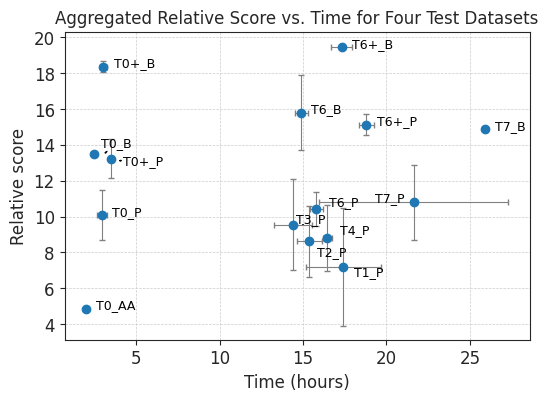

In [14]:
##### Plot for total relative score ##############
from adjustText import adjust_text
df=total_sum_time_df
with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='time', y='score')

    plt.errorbar(df['time'], df['score'], xerr=df['error_time'], yerr=df['error_score'],
                 fmt='o', ecolor='gray', elinewidth=0.8, capsize=2)
    
    # Adding annotations to the right of each point
    texts=[]
    for i in range(len(df)):
        if df["index"][i]=="T7_P":
            text=plt.text(x=df['time'][i] - 0.5, y=df['score'][i]-0.1, s=df['index'][i],
                     fontdict=dict(color='black', size=9), ha='right')        
        else:    
            text=plt.text(x=df['time'][i] + 0.5, y=df['score'][i]-0.1, s=df['index'][i],
                     fontdict=dict(color='black', size=9), ha='left')
        texts.append(text)

    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=1.0))
    plt.xlabel('Time (hours)')
    plt.ylabel('Relative score')
    plt.title('Aggregated Relative Score vs. Time for Four Test Datasets')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    #plt.savefig("full_nas_plots/val_datasets/total_val_scores_sns_error.png", format="png", dpi=300)  # Save as PNG
    #plt.savefig("full_nas_plots/val_datasets/total_val_scores_sns_error.svg", format="svg")           # Save as SVG
    #plt.savefig("full_nas_plots/val_datasets/total_val_scores_sns_error.png", format="png", dpi=300)  # Save as PNG
    #plt.savefig("full_nas_plots/val_datasets/total_val_scores_sns_error.svg", format="svg")           # Save as SVG
    
    #plt.savefig("full_nas_plots/test_datasets/total_test_scores_sns.png", format="png", dpi=300)  # Save as PNG
    #plt.savefig("full_nas_plots/test_datasets/total_test_scores_sns.svg", format="svg")           # Save as SVG
    
    #
    plt.savefig("full_nas_plots/test_datasets/total_test_scores_sns_error.png", format="png", dpi=300)  # Save as PNG
    plt.savefig("full_nas_plots/test_datasets/total_test_scores_sns_error.svg", format="svg")           # Save as SVG
    
    plt.show()


In [37]:
runtime_df.columns

Index(['Volga_mean', 'in16_mean', 'Sokoto_mean', 'CIFAR10_mean', 'Volga_error',
       'in16_error', 'Sokoto_error', 'CIFAR10_error'],
      dtype='object')

In [17]:
dataset="CIFAR10"

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

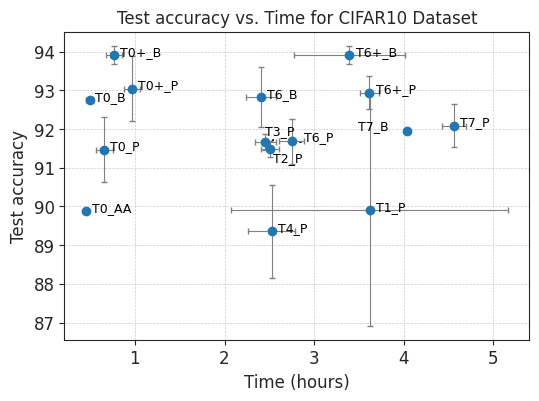

In [18]:
from adjustText import adjust_text

# Plotting with adjust_text for label positioning
df = total_raw_time_dfs[dataset]
with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='time', y='score')

    plt.errorbar(df['time'], df['score'], xerr=df['time_error'], yerr=df['score_error'],
                 fmt='o', ecolor='gray', elinewidth=0.8, capsize=2)
    # Adding annotations to each point
    texts = []
    for i in range(len(df)):
        if df["index"][i] == "T7_B":
            text = plt.text(x=df['time'][i]-0.2, y=df['score'][i]-0.05, s=df['index'][i],
                            fontdict=dict(color='black', size=9), ha='right')
        else:
            text = plt.text(x=df['time'][i]+0.05, y=df['score'][i]-0.05, s=df['index'][i],
                            fontdict=dict(color='black', size=9), ha='left')
        texts.append(text)

    # Automatically adjust text positions to reduce overlap
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=1.0))

    plt.xlabel('Time (hours)')
    plt.ylabel('Test accuracy')
    plt.title(f'Test accuracy vs. Time for {dataset} Dataset')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    #plt.savefig(f"full_nas_plots/val_datasets/{dataset}_val_scores_sns_error.png", format="png", dpi=300)  # Save as PNG
    #plt.savefig(f"full_nas_plots/val_datasets/{dataset}_val_scores_sns_error.svg", format="svg") 
    
    plt.savefig(f"full_nas_plots/test_datasets/{dataset}_test_scores_sns_error.png", format="png", dpi=300)  # Save as PNG
    plt.savefig(f"full_nas_plots/test_datasets/{dataset}_test_scores_sns_error.svg", format="svg") 
    #plt.savefig(f"full_nas_plots/test_datasets/{dataset}_test_scores_sns.png", format="png", dpi=300)  # Save as PNG
    #plt.savefig(f"full_nas_plots/test_datasets/{dataset}_test_scores_sns.svg", format="svg") 

    #plt.savefig(f"full_nas_plots/val_datasets/{dataset}_val_scores_sns.png", format="png", dpi=300)  # Save as PNG
    #plt.savefig(f"full_nas_plots/val_datasets/{dataset}_val_scores_sns.svg", format="svg") 
    plt.show()


In [54]:
color_map = {
    'T7_Proxy': '#636EFA',  # Blue
    'T0_Proxy': '#EF553B',  # Red
    'T0_Basic': '#9467BD',  # Purple
    'T0_Resnet': '#7F7F7F',  # Gray
    'T1_Proxy': '#00CC96',  # Green
    'T2_Proxy': '#AB63FA',  # Light Purple
    'T3_Proxy': '#FF4500',  # Light Purple
    'T4_Proxy': '#FFA15A',  # Orange
    'T6_Proxy': '#19D3F3',  # Cyan
    'ResNext': '#B6E880',  # Light Green
    'ResNet-18': '#FF97FF',  # Pink
    'Bonsai-Net': '#FFA07A',  # Salmon
    'BestCompetition': '#FECB52',  # Yellow
}


In [16]:
total_sum_time_df.sort_values(by="score",ascending=True)

index     score
8   T7_Proxy  0.741908
3   T1_Proxy  0.980428
4   T2_Proxy  1.107458
5   T3_Proxy  1.122323
6   T4_Proxy  1.143967
7   T6_Proxy  1.184193
2  T0_Resnet  1.403937
1   T0_Proxy  5.262531
0   T0_Basic  5.584020

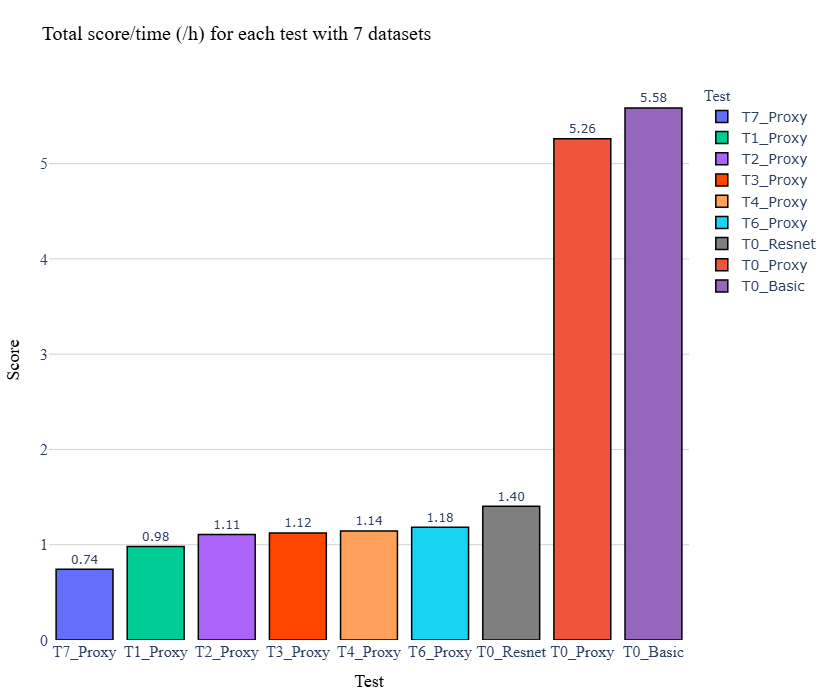

In [14]:
import plotly.express as px
#fig = px.bar(total_time_df, 
#             x='index', 
#             y='score', 
#             text='score',  # Display the score values on the bars
#             color='index',  # Color by the index for distinction
#color_discrete_map=color_map,
#             title='Total time (h) for each test with 6 datasets')  # Add a meaningful title
#fig = px.bar(total_sum_df, 
#             x='index', 
#             y='score', 
#             text='score',  # Display the score values on the bars
#            color='index',  # Color by the index for distinctio
#             color_discrete_map=color_map,
#             title='Total score for each test with 6 datasets')  # Add a meaningful title

fig = px.bar(total_sum_time_df.sort_values(by="score",ascending=True),#[total_sum_time_df["index"]!="T7_0"], 
            x='index', 
             y='score', 
             text='score',  # Display the score values on the bars
             color='index',  # Color by the index for distinction
            color_discrete_map=color_map,
             title='Total score/time (/h) for each test with 7 datasets')  # Add a meaningful title

# Customizing the layout for a more professional look
fig.update_layout(
    height=700,  # Increase the height
    width=900,  # Adjust the width
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis_title='Test',  # X-axis label
    yaxis_title='Score',  # Y-axis label
    xaxis_title_font=dict(size=18, family='Montserrat', color='black'),  # X-axis title font
    yaxis_title_font=dict(size=18, family='Montserrat', color='black'),  # Y-axis title font
    xaxis_tickfont=dict(size=16, family='Montserrat'),  # X-axis tick labels font
    yaxis_tickfont=dict(size=16, family='Montserrat'),  # Y-axis tick labels font
    legend_title_text='Test',  # Legend title
    legend_title_font=dict(size=16, family='Montserrat'),  # Legend title font
    legend_font=dict(size=14),  # Legend labels font
    plot_bgcolor='white',  # Background color
    margin=dict(l=40, r=40, t=80, b=40),  # Margins around the plot
    yaxis=dict(gridcolor='lightgrey')#, range=[0,8])  # Add light gridlines for better readability
    
)
#fig.update_yaxes(range=[10, 22], row=row, col=col)

# Add gridlines and adjust bar text size
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the updated plot
fig.show()

In [85]:
fig.write_image("thesis_plots/final_tests/score_time.svg", format="SVG")
fig.write_image("thesis_plots/final_tests/score_time.png", format="PNG")

In [49]:
raw_score_df_total

CIFAR10    in16  Volga  Sokoto
T0+_Basic         94.16  45.067  83.85   89.98
T0+_Proxy         93.70  38.933  83.90   62.57
T0_AutoAugment    89.88  30.667  83.42   32.58
T0_Basic          92.79  41.767  83.68   66.84
T0_Proxy          92.13  36.300  83.81   57.35
T1_Proxy          91.91  36.767  83.57   55.58
T2_Proxy          91.66  37.267  83.78   54.78
T3_Proxy          91.86  36.900  83.62   62.78
T4_Proxy          90.93  39.967  83.66   62.17
T6+_Basic         94.12  45.533  84.12   92.12
T6+_Proxy         93.41  44.067  83.89   75.13
T6_Basic          93.45  44.067  83.61   85.28
T6_Proxy          92.23  35.667  83.26   62.72
T7_Basic          91.95  43.633  83.64   75.56
T7_Proxy          92.74  34.533  83.15   66.62
ResNet-18         93.02     NaN    NaN     NaN
DenseNet          95.04     NaN    NaN     NaN
VGG16             92.64     NaN    NaN     NaN
ResNext           94.82     NaN    NaN     NaN
RegNetY-400MF     94.29     NaN    NaN     NaN
PC-Darts          93.41  41.310    NaN     NaN
DrNAS             94.36  46.340    NaN     NaN
DiNAS             94.37  45.410    NaN     NaN

In [40]:
#Language, Gutenberg, Adaline, Chesseract, Geoclassing, MultNIST, CIFARTile
raw_score_df_total.loc["ResNext"] = [93.97,40.3,91.42,55.15,89.9,90.57, 46.23]
raw_score_df_total.loc["ResNet-18"] = [97,49.98,92.08,57.83,80.33,91.55, 45.56]
raw_score_df_total.loc["DenseNet"] = [84.57, 43.28, 93.52,59.6,94.21,92.81,51.28]
raw_score_df_total.loc["MNASNet"] = [84.63,38, 90.51, 56.26,86,87.7,48.49]
raw_score_df_total.loc["VGG16"] = [84.54,44,92.06,55.69,93.67,90.43,24.43]

raw_score_df_total.loc["BestCompetition"] = [89.71,50.85,95.06,62.98,96.08,95.45, 73.08]
raw_score_df_total.loc["Bonsai-Net"] = [87.65,48.57,97.91, 60.76, 95.66,97.17, 91.47]
raw_score_df_total.loc["Random Bonsai"] = [76.83, 29, 34.17, 68.83, 63.56, 39.76, 24.76]
raw_score_df_total.loc["PC-DARTS"] = [90.12, 49.12, 96.6, 57.2, 94.61, 96.68,92.28]
raw_score_df_total.loc["DrNAS"] = [88.55,46.62,97.06,58.24,96.03,98.10,81.08]
raw_score_df_total.loc["Random DARTS"] = [90.12,47.72,97.07,59.16,95.54,96.55,90.74]
raw_score_df_total.columns=["LaMelo","Gutenberg","Adaline","Chester","Sadie","Mateo","Caitie"]

In [20]:

benchmark = {
    "LaMelo": 85.2,
    "Gutenberg": 40.98,
    "Adaline": 89.85,
    "Chester": 57.826,
    "Sadie": 80.33,
    "Mateo": 90.87,
    "Caitie": 47.008,
    "Sokoto":28.94,
    "CIFAR10":90.65,
    "Volga":71.35,
    "in16":23.39

}

# Scaling function
def scaling(raw_score, benchmark_value):
    scaling_factor = 10 / (100 - benchmark_value)
    adj_score = (raw_score - benchmark_value) * scaling_factor
    return max(-10, adj_score)

# Apply scaling based on benchmark dictionary
raw_score_df_total_adj = raw_score_df_total.apply(lambda col: col.apply(scaling, args=(benchmark[col.name],)))

In [21]:
raw_score_df_total_adj["total_score"]=raw_score_df_total_adj.sum(axis=1)

In [22]:
raw_score_df_total_adj.sort_values(by="total_score", ascending=False)

CIFAR10       in16      Volga     Sokoto  total_score
T6+_Basic       3.711230   2.890354   4.457243   8.891078    19.949904
T0+_Basic       3.754011   2.829526   4.363002   8.589924    19.536463
T6_Basic        2.994652   2.698995   4.279232   7.928511    17.901391
T6+_Proxy       2.951872   2.698995   4.376963   6.500141    16.527971
T7_Basic        1.390374   2.642344   4.289703   6.560653    14.883075
T0+_Proxy       3.262032   2.028847   4.380454   4.732620    14.403954
T0_Basic        2.288770   2.398773   4.303665   5.333521    14.324729
T7_Proxy        2.235294   1.454510   4.118674   5.302561    13.111039
T6_Proxy        1.689840   1.602532   4.157068   4.753729    12.203169
T3_Proxy        1.294118   1.763477   4.282723   4.762173    12.102490
T0_Proxy        1.582888   1.685159   4.349040   3.998030    11.615116
T4_Proxy        0.299465   2.163817   4.296684   4.676330    11.436296
T1_Proxy        1.347594   1.746117   4.265271   3.748945    11.107925
T2_Proxy        1.080214   1.811382   4.338569   3.636364    10.866529
T0_AutoAugment -0.823529   0.949876   4.212914   0.512243     4.851504
DrNAS           3.967914   2.995692 -10.000000 -10.000000   -13.036393
DiNAS           3.978610   2.874298 -10.000000 -10.000000   -13.147092
PC-Darts        2.951872   2.339120 -10.000000 -10.000000   -14.709008
DenseNet        4.695187 -10.000000 -10.000000 -10.000000   -25.304813
ResNext         4.459893 -10.000000 -10.000000 -10.000000   -25.540107
RegNetY-400MF   3.893048 -10.000000 -10.000000 -10.000000   -26.106952
ResNet-18       2.534759 -10.000000 -10.000000 -10.000000   -27.465241
VGG16           2.128342 -10.000000 -10.000000 -10.000000   -27.871658

In [37]:

raw_score_df_total[["Sokoto","in16","CIFAR10","Volga"]].to_csv("full_nas_plots/test_datasets/max_scores.csv")

In [19]:
# Test datasets
#raw_score_df_total.columns=["Volga","in16","Sokoto","CIFAR10"]
raw_score_df_total=raw_score_df_total[["CIFAR10","in16","Volga","Sokoto"]]

raw_score_df_total.loc["ResNet-18"]=[93.02,None,None,None]
raw_score_df_total.loc["DenseNet"]=[95.04,None,None,None]
raw_score_df_total.loc["VGG16"]=[92.64,None,None,None]
raw_score_df_total.loc["ResNext"]=[94.82,None,None,None]
raw_score_df_total.loc["RegNetY-400MF"]=[94.29,None,None,None]

raw_score_df_total.loc["PC-Darts"]=[93.41,41.31,None,None]
raw_score_df_total.loc["DrNAS"]=[94.36,46.34,None,None]
raw_score_df_total.loc["DiNAS"]=[94.37,45.41,None,None]
raw_score_df_total.columns=["CIFAR10","in16","Volga","Sokoto"]
#raw_score_df_total.to_csv("full_nas_plots/scores_comparisons_all_test.csv")

In [68]:
raw_score_df_total

CIFAR10    in16  Volga Sokoto
                   max     max    max    max
T0+_Basic        94.16  45.067  83.85  89.98
T0+_Proxy        93.70  38.933  83.90  62.57
T0_AutoAugment   89.88  30.667  83.42  32.58
T0_Basic         92.79  41.767  83.68  66.84
T0_Proxy         92.13  36.300  83.81  57.35
T1_Proxy         92.86  36.767  83.90  55.58
T2_Proxy         91.66  37.267  83.78  54.78
T3_Proxy         91.86  36.900  83.62  62.78
T4_Proxy         90.93  39.967  83.66  62.17
T6+_Basic        94.12  45.533  84.12  92.12
T6+_Proxy        93.41  44.067  83.89  75.13
T6_Basic         93.45  44.067  83.61  85.28
T6_Proxy         92.23  35.667  83.26  62.72
T7_Basic         91.95  43.633  83.64  75.56
T7_Proxy         92.74  34.533  83.15  66.62
ResNet-18        93.02     NaN    NaN    NaN
DenseNet         95.04     NaN    NaN    NaN
VGG16            92.64     NaN    NaN    NaN
ResNext          94.82     NaN    NaN    NaN
RegNetY-400MF    94.29     NaN    NaN    NaN
PC-Darts         93.41  41.310    NaN    NaN
DrNAS            94.36  46.340    NaN    NaN
DiNAS            94.37  45.410    NaN    NaN

In [29]:
raw_score_df_total

CIFAR10    in16  Volga  Sokoto
T0_AutoAugment    32.58  30.667  89.88   83.42
T0_Basic          66.84  41.767  92.79   83.68
T0_Proxy          57.35  36.300  92.13   83.81
T1_Proxy          55.58  36.767  92.86   83.90
T2_Proxy          54.78  37.267  91.66   83.78
T3_Proxy          62.78  36.900  91.86   83.62
T4_Proxy          62.17  39.967  90.93   83.66
T6_Basic          85.28  44.067  93.45   83.61
T6_Proxy          62.72  35.667  92.23   83.26
T7_Basic          75.56  43.633  91.95   83.64
T7_Proxy          66.62  34.533  92.74   83.15
ResNet-18         93.02     NaN    NaN     NaN
DenseNet          95.04     NaN    NaN     NaN
VGG16             92.64     NaN    NaN     NaN
ResNext           94.82     NaN    NaN     NaN
RegNetY-400MF     94.29     NaN    NaN     NaN
PC-Darts          93.41  41.310    NaN     NaN
DrNAS             94.36  46.340    NaN     NaN
DiNAS             94.37  45.410    NaN     NaN

In [44]:
max_rg=raw_score_df_total.iloc[:-11].max().reset_index().set_index("index").rename(columns={0:"Ours"}).T

In [45]:
raw_score_df_total_max=pd.concat([raw_score_df_total.iloc[-11:],max_rg], axis=0)

In [46]:
#raw_score_df_total.to_csv("full_nas_plots/scores_comparisons_all.csv")
#raw_score_df_total_max.rank(ascending=False).to_csv("full_nas_plots/position_comparisons.csv")
#raw_score_df_total_max.to_csv("full_nas_plots/scores_comparisons.csv")

In [47]:
max_rg

index  LaMelo  Gutenberg  Adaline  Chester   Sadie  Mateo  Caitie
Ours     88.2     47.867     97.2   62.086  97.109  96.14   86.93

In [48]:
raw_rank=raw_score_df_total_max.rank(ascending=False).astype(int)

In [49]:
cols={}
for dataset in raw_rank.columns:
    cols[dataset]=list(raw_rank.sort_values(by=dataset).T.columns)


In [50]:
cols_df=pd.DataFrame(cols).T
cols_df.columns=range(1,13)

In [51]:
cols_df

1                2             3             4   \
LaMelo           ResNet-18          ResNext      PC-DARTS  Random DARTS   
Gutenberg  BestCompetition        ResNet-18      PC-DARTS    Bonsai-Net   
Adaline         Bonsai-Net             Ours  Random DARTS         DrNAS   
Chester      Random Bonsai  BestCompetition          Ours    Bonsai-Net   
Sadie                 Ours  BestCompetition         DrNAS    Bonsai-Net   
Mateo                DrNAS       Bonsai-Net      PC-DARTS  Random DARTS   
Caitie            PC-DARTS       Bonsai-Net  Random DARTS          Ours   

                        5                6         7           8         9   \
LaMelo     BestCompetition            DrNAS      Ours  Bonsai-Net   MNASNet   
Gutenberg             Ours     Random DARTS     DrNAS       VGG16  DenseNet   
Adaline           PC-DARTS  BestCompetition  DenseNet   ResNet-18     VGG16   
Chester           DenseNet     Random DARTS     DrNAS   ResNet-18  PC-DARTS   
Sadie         Random DARTS         PC-DARTS  DenseNet       VGG16   ResNext   
Mateo                 Ours  BestCompetition  DenseNet   ResNet-18   ResNext   
Caitie               DrNAS  BestCompetition  DenseNet     MNASNet   ResNext   

                  10             11             12  
LaMelo      DenseNet          VGG16  Random Bonsai  
Gutenberg    ResNext        MNASNet  Random Bonsai  
Adaline      ResNext        MNASNet  Random Bonsai  
Chester      MNASNet          VGG16        ResNext  
Sadie        MNASNet      ResNet-18  Random Bonsai  
Mateo          VGG16        MNASNet  Random Bonsai  
Caitie     ResNet-18  Random Bonsai          VGG16

In [52]:
cols_df.T.to_csv("full_nas_plots/models_order.csv")

In [53]:
cols_df

1                2             3             4   \
LaMelo           ResNet-18          ResNext      PC-DARTS  Random DARTS   
Gutenberg  BestCompetition        ResNet-18      PC-DARTS    Bonsai-Net   
Adaline         Bonsai-Net             Ours  Random DARTS         DrNAS   
Chester      Random Bonsai  BestCompetition          Ours    Bonsai-Net   
Sadie                 Ours  BestCompetition         DrNAS    Bonsai-Net   
Mateo                DrNAS       Bonsai-Net      PC-DARTS  Random DARTS   
Caitie            PC-DARTS       Bonsai-Net  Random DARTS          Ours   

                        5                6         7           8         9   \
LaMelo     BestCompetition            DrNAS      Ours  Bonsai-Net   MNASNet   
Gutenberg             Ours     Random DARTS     DrNAS       VGG16  DenseNet   
Adaline           PC-DARTS  BestCompetition  DenseNet   ResNet-18     VGG16   
Chester           DenseNet     Random DARTS     DrNAS   ResNet-18  PC-DARTS   
Sadie         Random DARTS         PC-DARTS  DenseNet       VGG16   ResNext   
Mateo                 Ours  BestCompetition  DenseNet   ResNet-18   ResNext   
Caitie               DrNAS  BestCompetition  DenseNet     MNASNet   ResNext   

                  10             11             12  
LaMelo      DenseNet          VGG16  Random Bonsai  
Gutenberg    ResNext        MNASNet  Random Bonsai  
Adaline      ResNext        MNASNet  Random Bonsai  
Chester      MNASNet          VGG16        ResNext  
Sadie        MNASNet      ResNet-18  Random Bonsai  
Mateo          VGG16        MNASNet  Random Bonsai  
Caitie     ResNet-18  Random Bonsai          VGG16

In [54]:
def highlight_ours(val):
    color = 'background-color: #FFDDC1' if val == "Ours" else ''
    return color

# Apply the style
styled_df = cols_df.T.style.applymap(highlight_ours).set_caption("Model Rankings per Dataset")

# Customize for paper-friendly aesthetics
styled_df = styled_df.set_properties(**{
    'text-align': 'center',
    'border-color': 'black'
}).set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '12pt'), ('text-align', 'center'), ('font-weight', 'bold')]
}])
#styled_df.to_latex(buf="full_nas_plots/table_for_paper.tex", hrules=True)  # Export for LaTeX integration


/tmp/ipykernel_4137084/773858902.py:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = cols_df.T.style.applymap(highlight_ours).set_caption("Model Rankings per Dataset")


In [55]:
from weasyprint import HTML
html_path = "full_nas_plots/ranks.html"
svg_path = "full_nas_plots/ranks.pdf"
HTML(html_path).write_pdf(svg_path)

In [56]:
styled_df

In [61]:
html_path = "full_nas_plots/ranks.html"
styled_df.to_html(html_path)

In [57]:
#raw_score_df=raw_score_df[~raw_score_df.index.isin(["T0_Basic","T0_Resnet","T3_Proxy","T4_Proxy"])]

In [63]:
raw_score_df.to_csv("full_nas_plots/val_datasets/raw_scores.csv")

In [62]:
raw_score_df

LaMelo_mean  Gutenberg_mean  Adaline_mean  Chester_mean  \
T0+_Basic       80.163333       46.383333     96.536667     55.049000   
T0+_Proxy       87.586667       44.722333     96.480000     58.296000   
T0_Basic        79.043333       46.066667     95.976667     60.186000   
T0_Proxy        86.230000       45.361333     95.386667     60.289333   
T0_Resnet_10    86.420000       44.733000     94.160000     56.746000   
T0_Resnet_20    87.580000       46.233000     94.040000     60.226000   
T1_Proxy        86.100000       43.589000     95.643333     56.789000   
T2_Proxy        86.253333       44.577667     95.386667     60.022667   
T3_Proxy        86.290000       46.028000     95.773333     58.592667   
T4_Proxy        85.513333       44.489000     95.676667     59.249333   
T6+_Basic       79.400000       47.322333     96.940000     60.656000   
T6+_Proxy       87.266667       46.355667     96.246667     58.016000   
T6_Basic        77.355000       45.641500     96.605000     60.421000   
T6_Proxy        86.130000       46.705667     96.180000     59.779333   
T7_Proxy        87.450000       46.233000     96.360000     62.086000   

              Sadie_mean  Mateo_mean  Caitie_mean  LaMelo_error  \
T0+_Basic      96.735667   95.943333    85.803333         0.185   
T0+_Proxy      96.137667   95.376667    77.143333         0.765   
T0_Basic       96.187333   94.743333    81.036667         0.680   
T0_Proxy       96.107000   93.780000    71.283333         0.885   
T0_Resnet_10   94.846000   91.410000    75.820000         0.000   
T0_Resnet_20   96.046000   92.250000    73.360000         0.000   
T1_Proxy       96.145333   93.276667    70.280000         0.995   
T2_Proxy       95.642333   94.146667    72.023333         0.940   
T3_Proxy       95.699667   94.080000    72.563333         1.365   
T4_Proxy       95.265333   95.743333    77.633333         1.230   
T6+_Basic      96.838667   94.950000    83.953333         1.195   
T6+_Proxy      93.623333   94.510000    79.026667         0.785   
T6_Basic       95.434500   96.140000    85.055000         0.395   
T6_Proxy       95.650000   95.480000    78.220000         0.490   
T7_Proxy       95.018000   95.810000    80.230000         0.000   

              Gutenberg_error  Adaline_error  Chester_error  Sadie_error  \
T0+_Basic              1.5665          0.545         4.2455       0.2855   
T0+_Proxy              1.2585          0.370         2.1750       0.8455   
T0_Basic               0.6835          0.480         1.0500       0.3315   
T0_Proxy               2.0750          0.115         1.4400       0.4860   
T0_Resnet_10           0.0000          0.000         0.0000       0.0000   
T0_Resnet_20           0.0000          0.000         0.0000       0.0000   
T1_Proxy               0.7250          0.310         2.8255       0.4575   
T2_Proxy               0.6000          1.140         1.7650       0.0515   
T3_Proxy               1.1500          0.230         1.7300       0.4970   
T4_Proxy               0.2170          0.370         0.9100       0.4745   
T6+_Basic              0.4750          0.195         0.9250       0.2800   
T6+_Proxy              0.6585          0.130         1.0950       4.8450   
T6_Basic               0.2585          0.015         0.2750       0.1885   
T6_Proxy               0.8835          0.340         1.2400       0.1085   
T7_Proxy               0.0000          0.000         0.0000       0.0000   

              Mateo_error  Caitie_error  
T0+_Basic           0.080         0.870  
T0+_Proxy           0.365         2.055  
T0_Basic            0.440         1.060  
T0_Proxy            0.435         1.890  
T0_Resnet_10        0.000         0.000  
T0_Resnet_20        0.000         0.000  
T1_Proxy            0.725         1.440  
T2_Proxy            0.245         1.895  
T3_Proxy            0.220         2.925  
T4_Proxy            0.215         1.060  
T6+_Basic           0.410         3.025  
T6+_Proxy           0.660         1.595  
T6_Basic 

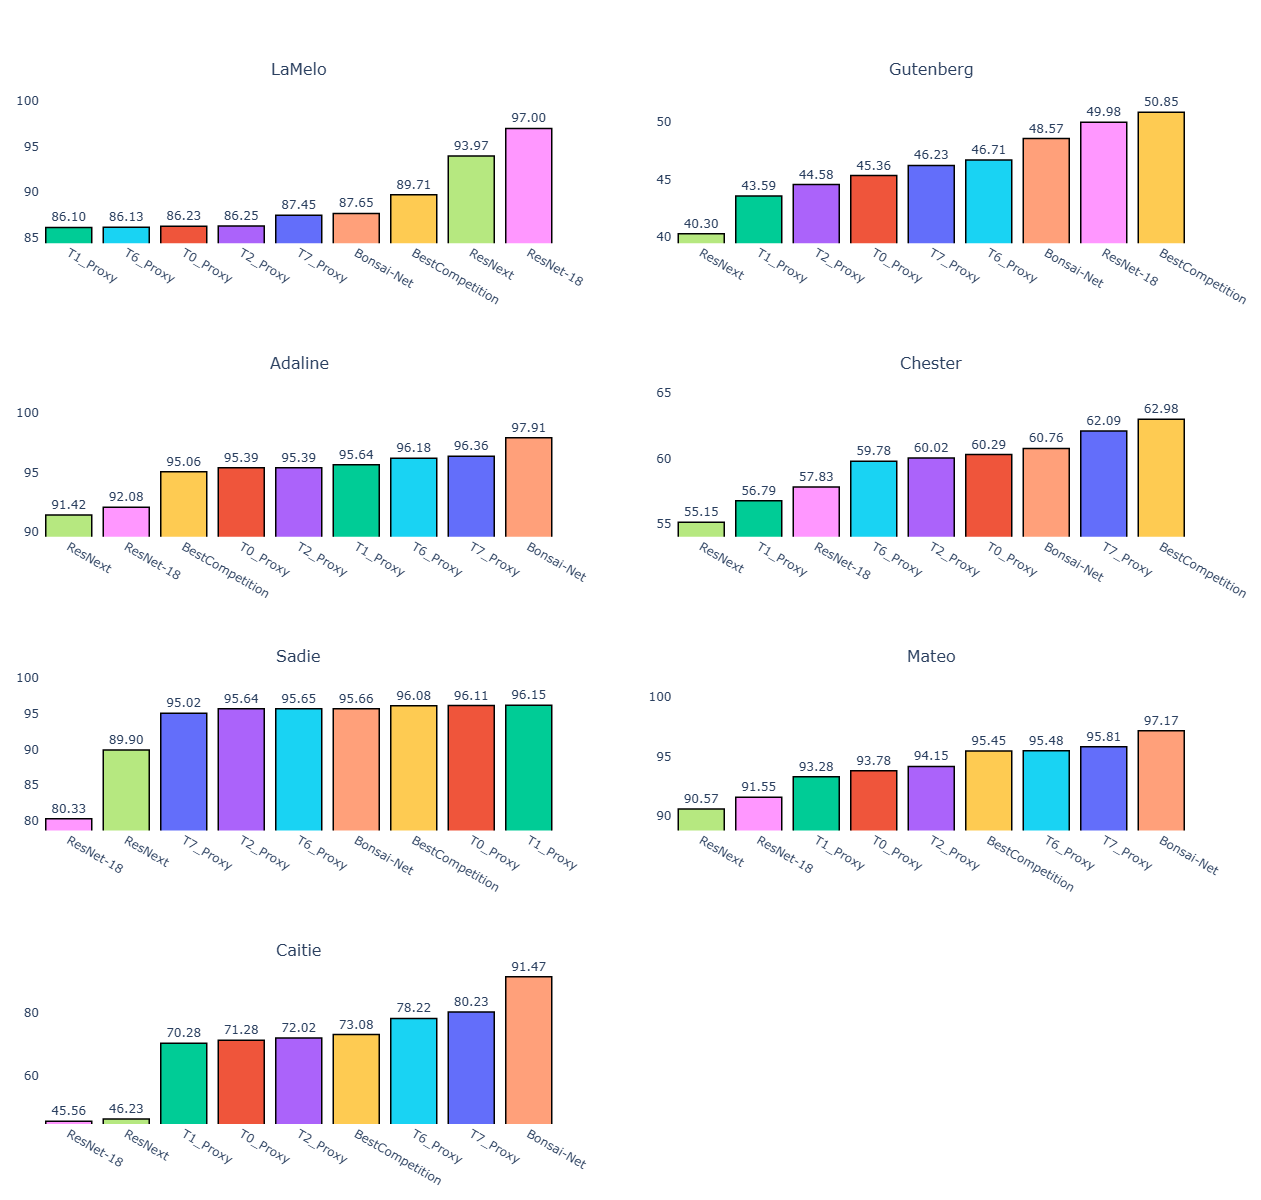

In [86]:
import plotly.subplots as sp
import plotly.graph_objects as go

plot_df = raw_score_df  # Asumiendo que `raw_score_df` es el DataFrame

# Crear subparcelas con 4 filas y 2 columnas
fig = sp.make_subplots(rows=4, cols=2, subplot_titles=plot_df.columns)

# Definir el mapa de colores
def get_color_for_index(index):
    return color_map.get(index, '#636EFA')  # Default a azul si no está en el mapa

# Agregar trazos para cada columna y mostrar los valores de las barras
for i, column in enumerate(plot_df.columns):
    row = i // 2 + 1  # Modificado para 2 columnas por fila (4 filas)
    col = i % 2 + 1   # Modificado para 2 columnas por fila
    
    # Ordenar los valores para la columna actual
    sorted_df = plot_df[[column]].sort_values(by=column)

    # Obtener los índices y valores ordenados
    sorted_indices = sorted_df.index
    sorted_values = sorted_df[column]

    # Mapear los colores para los índices ordenados
    colors = [get_color_for_index(idx) for idx in sorted_indices]
    
    # Añadir la barra para la columna actual con bordes
    fig.add_trace(
        go.Bar(
            x=sorted_indices, 
            y=sorted_values, 
            name=column, 
            marker=dict(
                color=colors, 
                line=dict(color='black', width=1.5)  # Añadir borde negro a las barras
            ),
            showlegend=False,
            text=sorted_values,  # Mostrar los valores ordenados
            textposition='outside',  # Posición del texto fuera de las barras
            texttemplate='%{text:.2f}',  # Formato del texto a 2 decimales
        ),
        row=row, col=col
    )

# Ajustar automáticamente el rango del eje y para cada subparcela
for i, column in enumerate(plot_df.columns):
    row = i // 2 + 1  # Modificado para 2 columnas por fila
    col = i % 2 + 1   # Modificado para 2 columnas por fila
    min_val = plot_df[column].min()
    max_val = plot_df[column].max()
    # Añadir un pequeño margen al rango
    fig.update_yaxes(range=[min_val * 0.98, max_val * 1.055], row=row, col=col)

# Actualizar el diseño
fig.update_layout(
    height=1200,  # Aumentar altura para acomodar 4 filas
    width=1000,   # Ancho ajustado para 2 columnas
    title_text="", 
    showlegend=False,
    plot_bgcolor='white',  # Fondo blanco para el gráfico
    paper_bgcolor='white',  # Fondo blanco para todo el lienzo
    margin=dict(t=80, b=40, l=40, r=40),  # Ajustar los márgenes para un mejor espaciado
    font=dict(size=12),  # Ajustar tamaño de fuente para mejor legibilidad
    title_font=dict(size=16, color='black', family="Arial"),  # Fuente para el título
)

# Mostrar la gráfica
fig.show()


In [87]:
fig.write_image("thesis_plots/final_tests/raw_scores.svg",format="SVG")
fig.write_image("thesis_plots/final_tests/raw_scores.png",format="PNG")

# Individual results

In [121]:
paths = {
    "Adaline": {
        "T0_5": "tests_Adaline_24_09_2024_17_28",
        "T1_5": "",
        "T2_5": "tests_Adaline_25_09_2024_16_40",
        "T3_5": "",
        "T4_5": "tests_Adaline_25_09_2024_17_03",
        "T5_5": "tests_Adaline_25_09_2024_16_45",
        "T6_5": "tests_Adaline_25_09_2024_16_45",
        "T7_5": ""
    },
    "Chester": {
        "T0_5": "tests_Chester_24_09_2024_16_52",
        "T1_5": "",
        "T2_5": "tests_Chester_25_09_2024_14_24",
        "T3_5": "",
        "T4_5": "tests_Chester_25_09_2024_14_34",
        "T5_5": "tests_Chester_25_09_2024_14_24",
        "T6_5": "tests_Chester_25_09_2024_15_41",
        "T7_5": ""
    },
    "Gutenberg": {
        "T0_5": "tests_Gutenberg_24_09_2024_23_55",
        "T1_5": "tests_Gutenberg_25_09_2024_00_26",
        "T2_5": "",
        "T3_5": "",
        "T4_5": "",
        "T5_5": "",
        "T6_5": "",
        "T7_5": ""
    },
    "LaMelo": {
        "T0_5": "tests_LaMelo_24_09_2024_15_57",
        "T1_5": "tests_LaMelo_24_09_2024_16_31",
        "T2_5": "tests_LaMelo_25_09_2024_12_12",
        "T3_5": "",
        "T4_5": "tests_LaMelo_25_09_2024_12_17",
        "T5_5": "tests_LaMelo_25_09_2024_12_20",
        "T6_5": "tests_LaMelo_25_09_2024_12_21",
        "T7_5": ""
    },
    "Mateo": {
        "T0_5": "tests_Mateo_25_09_2024_03_04",
        "T1_5": "tests_Mateo_25_09_2024_04_06",
        "T2_5": "",
        "T3_5": "",
        "T4_5": "",
        "T5_5": "",
        "T6_5": "",
        "T7_5": ""
    },
    "Sadie": {
        "T0_5": "tests_Sadie_25_09_2024_00_55",
        "T1_5": "",
        "T2_5": "",
        "T3_5": "",
        "T4_5": "",
        "T5_5": "",
        "T6_5": "",
        "T7_5": ""
    }
}


In [122]:
import json
import pandas as pd

baseline_path=f"{paths[dataset][test_name_baseline]}"
file_path_baseline=f"{main_path}/{test_name_baseline}/{baseline_path}/{baseline_path}.evonas"
with open(file_path_baseline, 'r') as file:
    results_baseline = json.load(file)

test_path=f"{paths[dataset][test_name]}"
file_path=f"{main_path}/{test_name}/{test_path}/{test_path}.evonas"
with open(file_path, 'r') as file:
    results = json.load(file)

In [123]:
results["parameters"]

{'ENAS': True,
 'proxy': True,
 'transfer_weights': True,
 'pretrained_pool': True,
 'population_size': 20,
 'total_generations': 3,
 'num_best_parents': 5,
 'sim_threshold': 0.07000000000000002,
 'multiprocessing': False,
 'update_pool': True,
 'initial_population_size': 20}

In [124]:
results_baseline["parameters"]

{'ENAS': True,
 'proxy': False,
 'transfer_weights': False,
 'pretrained_pool': False,
 'population_size': 20,
 'total_generations': 3,
 'num_best_parents': 5,
 'sim_threshold': 0.07000000000000002,
 'multiprocessing': False,
 'update_pool': False,
 'initial_population_size': 20}

In [125]:
results_df_baseline=pd.read_json(results_baseline["results"])
results_df_baseline=results_df_baseline[["name","ws","ds","num_stages","params","WA","W0","WM","DEPTH","GROUP_W","train_acc","train_loss","test_loss"]]

results_df=pd.read_json(results["results"])
results_df=results_df[["name","ws","ds","num_stages","params","WA","W0","WM","DEPTH","GROUP_W","train_acc","train_loss","test_loss"]]

/tmp/ipykernel_3120442/441791964.py:1: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

/tmp/ipykernel_3120442/441791964.py:4: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [126]:
import pandas as pd




In [127]:
train_data_baseline, train_data_cum_baseline=get_train_data(main_path, test_name_baseline, baseline_path, num_generations)
train_data, train_data_cum=get_train_data(main_path, test_name, test_path, num_generations)

['daring_crayfish', 'dandelion_turkey', 'tidy_newt', 'spectral_dolphin', 'resourceful_okapi', 'meticulous_panda', 'archetypal_vicugna', 'adept_magpie', 'fortunate_oryx', 'agile_labrador', 'placid_crayfish', 'green_bandicoot', 'hulking_swallow', 'blue_loon', 'splendid_barracuda', 'mahogany_platypus', 'offbeat_mackerel', 'speedy_zebu', 'industrious_trout', 'beryl_labrador']
['ambrosial_iguana', 'amphibian_python', 'cautious_chipmunk', 'celadon_snake', 'clay_tarsier', 'emerald_muskox', 'enormous_numbat', 'fortunate_bobcat', 'glittering_swine', 'imaginary_chamois', 'lavender_partridge', 'magnetic_seriema', 'majestic_cassowary', 'manipulative_quetzal', 'mini_beagle', 'modest_agouti', 'pearl_jaguar', 'satisfied_lionfish', 'violet_dove', 'white_warthog']
['acoustic_dugong', 'arboreal_giraffe', 'beryl_gaur', 'celadon_waxbill', 'crafty_bettong', 'daft_albatross', 'fantastic_dachshund', 'fresh_peccary', 'impetuous_gaur', 'innocent_cockle', 'lilac_echidna', 'mindful_sheep', 'nano_turkey', 'organi

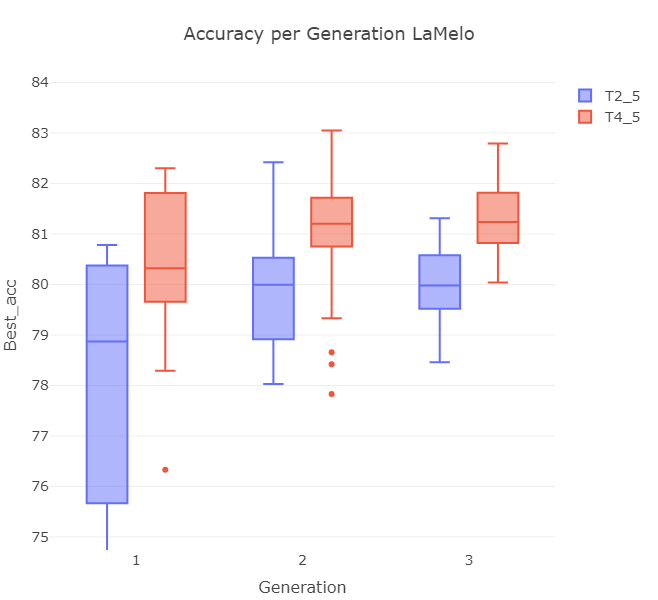

In [129]:
colors = ['#636EFA', '#EF553B', '#00CC96']
fig=plot_boxplots([train_data_baseline.reset_index(), train_data.reset_index()], x_column='generation', y_column='best_acc', colors=colors,  title=f'Accuracy per Generation {dataset}', names=[test_name_baseline, test_name])


In [130]:
test_name

'T4_5'

In [131]:
if not os.path.exists(f"thesis_plots/{dataset}/{test_name}"):
        os.mkdir(f"thesis_plots/{dataset}/{test_name}")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/box_plots_{test_name}_{test_name_baseline}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/box_plots_{test_name}_{test_name_baseline}.png", format="png")

In [132]:
total_df=pd.merge(results_df,train_data, on="name")
total_df.to_csv(f"thesis_plots/{dataset}/{test_name}/results_df.csv")

In [133]:
if not os.path.exists(f"thesis_plots/{dataset}/{test_name_baseline}"):
        os.mkdir(f"thesis_plots/{dataset}/{test_name_baseline}")
total_df_baseline=pd.merge(results_df_baseline,train_data_baseline, on="name")
total_df_baseline.to_csv(f"thesis_plots/{dataset}/{test_name_baseline}/results_df_baseline.csv")

## Line plots

In [134]:
train_data_cum_baseline=train_data_cum_baseline.reset_index()
train_data_cum=train_data_cum.reset_index()

In [135]:
gens=[1,2,3]

In [136]:

fil_df_baseline=train_data_cum_baseline[train_data_cum_baseline.generation.isin(gens)].set_index(["generation","name"])
fil_df=train_data_cum[train_data_cum.generation.isin(gens)].set_index(["generation","name"])

mean_df=pd.DataFrame([fil_df_baseline.mean().reset_index(drop=True),fil_df.mean().reset_index(drop=True)]).iloc[:,:-1].T.rename(columns={0:test_name_baseline,1:test_name})

min_q=0.0
#df_min=pd.DataFrame([train_data_cum.min().reset_index(drop=True),train_data_dist_cum.min().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min=pd.DataFrame([fil_df_baseline.quantile(min_q).reset_index(drop=True),fil_df.quantile(min_q).reset_index(drop=True)]).iloc[:,:-1].T.rename(columns={0:test_name_baseline,1:test_name})
df_min.columns=[test_name_baseline,test_name]

max_q=1.0
#df_max=pd.DataFrame([train_data_cum.max().reset_index(drop=True),train_data_dist_cum.max().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max=pd.DataFrame([fil_df_baseline.quantile(max_q).reset_index(drop=True),fil_df.quantile(max_q).reset_index(drop=True)]).iloc[:,:-1].T.rename(columns={0:test_name_baseline,1:test_name})
df_max.columns=[test_name_baseline,test_name]

In [137]:
mean_df

T2_5       T4_5
0  10.049492  10.025085
1  59.620847  64.946610
2  70.685424  74.606610
3  75.284407  77.942373
4  77.527288  79.830339
5  78.981695  80.835424

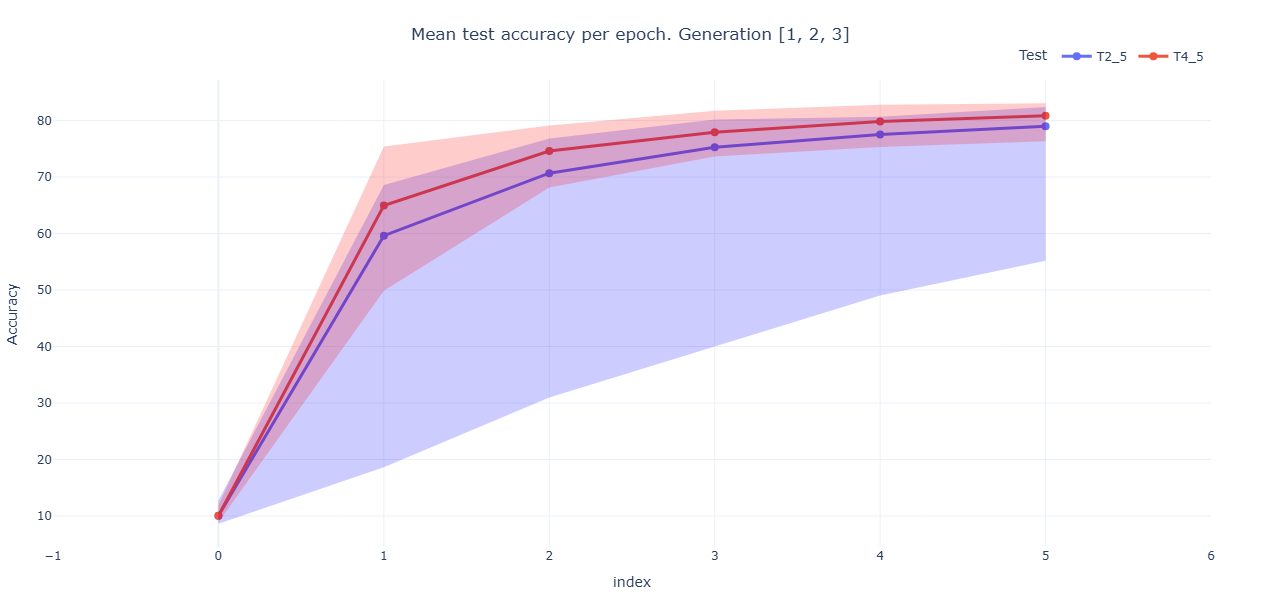

In [138]:
import plotly.express as px
import pandas as pd

# Assuming 'mean_df', 'df_min', and 'df_max' are your dataframes
fig = px.line(
    mean_df, 
    y=[test_name_baseline, test_name], 
    title='Mean test accuracy per epoch',
    labels={"Value": "Accuracy"},
    markers=True,  # Add markers to the lines
    template="plotly_white", 
    width=1000, height=600
)

# Update trace settings for the main plot
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Adding min-max range shadows for 'vanilla'
#fig.add_traces([
#    px.line(mean_df, y='vanilla').data[0],  # Add the vanilla mean line
#    px.line(mean_df, y='inheritance').data[0]  # Add the inheritance mean line
#])

fig.add_traces([
    # Min-max shadows for 'vanilla'
    dict(
        x=mean_df.index, 
        y=df_min[test_name_baseline], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max[test_name_baseline], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(0, 0, 255, 0.2)',  # Light red for shadow
        showlegend=False
    ),
    
    # Min-max shadows for 'inheritance'
    dict(
        x=mean_df.index, 
        y=df_min[test_name], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max[test_name], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(255, 0, 0, 0.2)',  # Light blue for shadow
        showlegend=False
    )
])

# Update layout settings
fig.update_layout(
    title={'text': f'Mean test accuracy per epoch. Generation {gens}', 'x':0.5, 'xanchor': 'center'},
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 6]),
    yaxis=dict(title="Accuracy"),
    legend=dict(title='Test', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()


In [317]:
fig.write_image(f"thesis_plots/{dataset}/{test_name}/line_plots_gens_{"_".join(map(str,gens))}_{test_name}_{test_name_baseline}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/line_plots_gens_{"_".join(map(str,gens))}_{test_name}_{test_name_baseline}.png", format="png")

# Proxy augmentations plots

In [1]:
import pandas as pd
aug_dfs={}
corr_matrix={}
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    aug_dfs[dataset]=pd.read_csv(f"../zcost_proxies/results/augs/ranks_{dataset}.csv", index_col=0)
    aug_dfs[dataset]["total_rank"]=aug_dfs[dataset]["total_rank"]*-1
    
    aug_dfs[dataset]["rank_proxy"]=aug_dfs[dataset].set_index("aug")["total_rank"].rank(ascending=False).values.astype(int)
    aug_dfs[dataset]["rank_acc"]=aug_dfs[dataset].set_index("aug")["test_acc"].rank(ascending=False).values.astype(int)
    corr_matrix[dataset]=aug_dfs[dataset][["fisher","jacob_cov","total_rank","test_acc", "val_acc"]].corr(method='spearman')
    
#corr_matrix={}
#for dataset in ["LaMelo","LaMelo_2","Gutenberg", "Adaline","Chester", "Gutenberg_2", "Sokoto","Adaline_2"]:
#    aug_dfs[dataset]=pd.read_csv(f"zcost_proxies/results/augs/total_rank_{dataset}.csv", index_col=0)
#    aug_dfs[dataset]["total_rank"]=aug_dfs[dataset]["total_rank"]*-1
    


In [6]:
#fig.write_image(f"zcost_proxies/results/augs/{dataset}_augs.svg", format="svg")
#fig.write_image(f"zcost_proxies/results/augs/{dataset}_augs.png", format="png")

In [2]:
fisher={}
jacob_cov={}
total_rank={}
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    fisher[dataset]=corr_matrix[dataset].loc["fisher","test_acc"]*-1
    jacob_cov[dataset]=corr_matrix[dataset].loc["jacob_cov","test_acc"]*-1
    total_rank[dataset]=corr_matrix[dataset].loc["total_rank","test_acc"]

In [3]:
fisher_df=pd.DataFrame([fisher], index=["fisher"])
jacob_df=pd.DataFrame([jacob_cov], index=["jacob_cov"])
total_df=pd.DataFrame([total_rank], index=["total_rank"])

In [4]:
corrs_df=pd.concat([fisher_df,jacob_df, total_df]).T.sort_values(by="total_rank")

In [11]:
dataset="gutenberg"
resnet_scores_df=[]
for i in range(23):
    try:
        df_aux_resnet=pd.read_csv(f"/home/woody/iwb3/iwb3021h/THESIS_RESULTS/full_training_evonas/finetuning/{dataset}/augmentations_test_resnet/{dataset}/aug_{i}/test_acc.csv", index_col=0)
        df_aux_resnet["aug"]=i
        resnet_scores_df.append(df_aux_resnet)

    except:
        print(f"{i} not possible")
resnet_scores_df=pd.concat(resnet_scores_df).rename(columns={"test_acc":"Resnet"})

rg_scores_df=[]
for i in range(23):
    try:
        df_aux=pd.read_csv(f"/home/woody/iwb3/iwb3021h/THESIS_RESULTS/full_training_evonas/finetuning/{dataset}/augmentations_test_1/{dataset}/aug_{i}/test_acc.csv", index_col=0)
        df_aux["aug"]=i
        rg_scores_df.append(df_aux)

    except:
        print(f"{i} not possible")
rg_scores_df=pd.concat(rg_scores_df).rename(columns={"test_acc":"RegNet"})

scores_merged=pd.merge(rg_scores_df, resnet_scores_df, on="aug")

0 not possible
1 not possible
2 not possible
3 not possible
4 not possible
5 not possible
6 not possible
7 not possible
8 not possible
9 not possible
10 not possible
11 not possible
12 not possible
13 not possible
14 not possible
15 not possible
16 not possible
17 not possible
18 not possible
19 not possible
20 not possible
21 not possible
22 not possible


ValueError: No objects to concatenate

In [112]:
from scipy.stats import spearmanr
#corrs_regnet={}
corrs_regnet[dataset.lower()]=spearmanr(scores_merged["RegNet"],scores_merged["Resnet"])[0]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

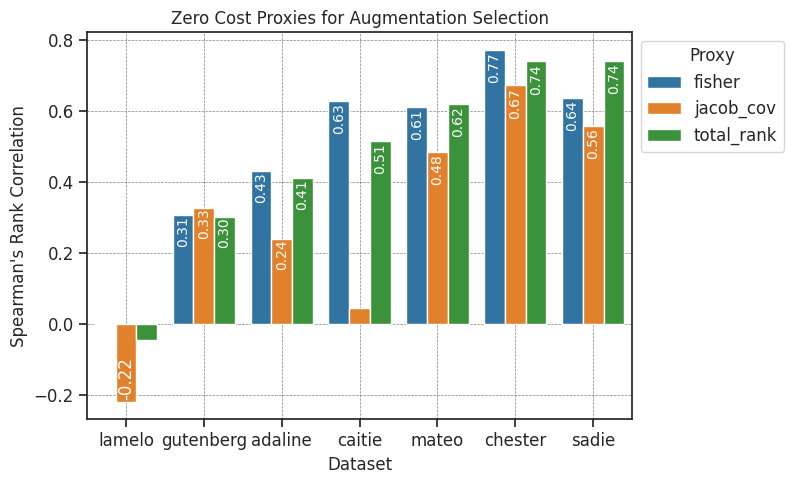

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 


with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    # Set up the plot dimensions and styles
    plt.figure(figsize=(9, 5))
    #sns.set(style="whitegrid")

    # Melt the DataFrame to "long format" for Seaborn
    melted_df = corrs_df.reset_index().melt(id_vars="index", var_name="Proxy", value_name="Correlation")

    # Create the bar plot
    ax = sns.barplot(
        data=melted_df, x="index", y="Correlation", hue="Proxy", palette=colors
    )

    # Title and labels
    plt.title("Zero Cost Proxies for Augmentation Selection")
    plt.xlabel("Dataset")
    plt.ylabel("Spearman's Rank Correlation")


    # Position legend on the right
    ax.legend(title="Proxy", loc='upper left', bbox_to_anchor=(1, 1))

    # Add text labels on top of bars, adjusting for positive and negative values
    for p in ax.patches:
        height = p.get_height()
        if np.abs(height)>0.1:
            if height > 0:
                # For positive values, place text slightly below the top of the bar
                ax.annotate(
                    f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height * 0.99),
                    ha='center', va='top', fontsize=10, color="white", rotation=90
                )
            else:
                # For negative values, place text slightly above the bottom of the bar
                ax.annotate(
                    f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height * 0.98),
                    ha='center', va='bottom', fontsize=12, color="white", rotation=90
                )


    # Remove spines and customize grid
    #sns.despine(left=True, bottom=True)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for legend
    
    plt.savefig(f"../zcost_proxies/results/augs/corrs_barplot.png", format="png", dpi=300)  # Save as PNG
    plt.savefig(f"../zcost_proxies/results/augs/corrs_barplot.svg", format="svg") 
    # Adjust layout to fit everything neatly

    # Show the plot
    plt.show()

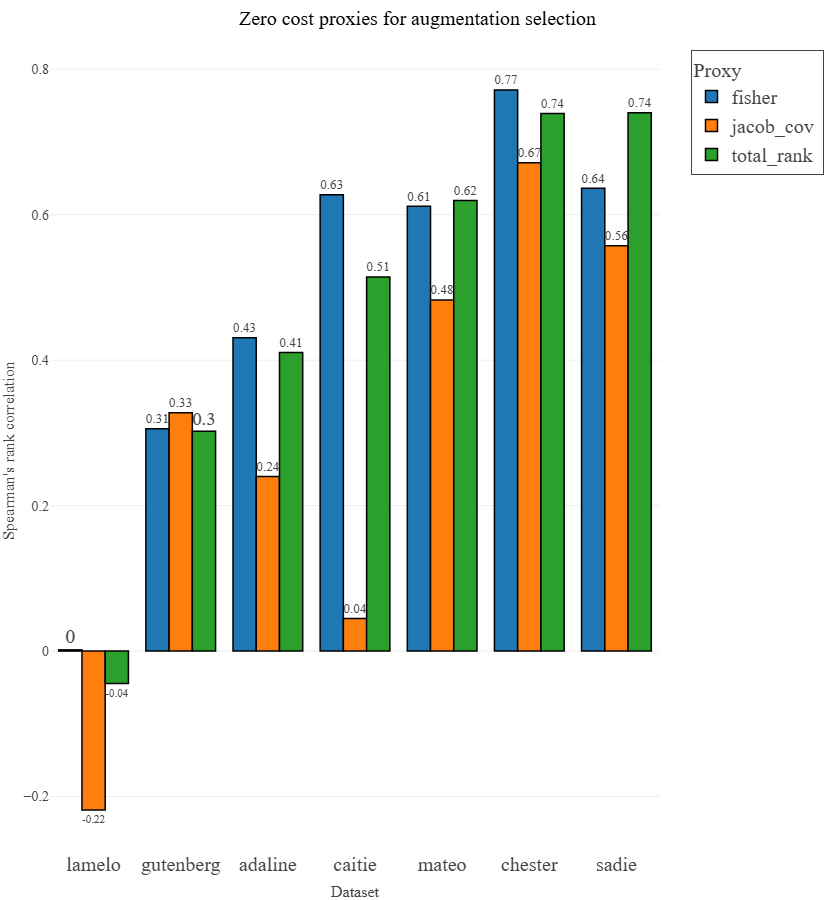

In [5]:

import plotly.graph_objects as go
fig = go.Figure()

# Define colors for each column for better visual differentiation
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional, distinguishable color scheme

# Add bars for each column with scientific formatting
for i, col in enumerate(corrs_df.columns):
    fig.add_trace(go.Bar(
        x=corrs_df.index,
        y=corrs_df[col],
        name=col,  # Each bar group named after the column
        marker_color=colors[i],  # Set the custom color for each bar group
        text=corrs_df[col].round(2),  # Display the values as text on the bars
        textposition='outside',  # Position the text outside the bars
        textfont=dict(size=20, family='Times New Roman'),  # Customize the text font
    ))

# Update the layout for a clean, professional look with legend on the right side
fig.update_layout(
    title="Zero cost proxies for augmentation selection", c # Title of the plot
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis=dict(
        title="Dataset",  # X-axis label
        tickmode='linear',
        tickfont=dict(family='Times New Roman', size=20),
        title_font=dict(size=16, family='Times New Roman'),
        showgrid=False  # Remove grid for a cleaner look
    ),
    yaxis=dict(
        title="Spearman's rank correlation",  # Y-axis label
        title_font=dict(size=16, family='Times New Roman'),
        tickfont=dict(family='Times New Roman', size=14),
        showgrid=True,  # Optional: gridlines for y-axis to aid interpretation
        zeroline=False  # Remove the default zero line for clarity
    ),
    barmode='group',  # Grouped bars for better comparison
    font=dict(family='Times New Roman', size=14),  # Set the overall font for the figure
    legend=dict(
        title="Proxy",  # Legend title
        title_font=dict(family='Times New Roman', size=20),
        font=dict(family='Times New Roman', size=20),
        x=1.05,  # Move the legend to the right of the plot
        y=1,  # Keep the legend at the top
        xanchor="left",  # Anchor the legend to the left of its position
        borderwidth=1,  # Optional: Add a border around the legend for clarity
    ),
    margin=dict(l=50, r=100, t=50, b=50),  # Increase right margin to accommodate the legend
    width=1200,  # Set figure width
    height=900,  # Set figure height
    template="presentation",
    plot_bgcolor='white',  # Background color

)
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the plot
fig.show()

In [133]:
#fig.write_image("zcost_proxies/results/augs/corrs_barplot.png",format="png")
#fig.write_image("zcost_proxies/results/augs/corrs_barplot.svg",format="svg")

In [155]:
dataset="adaline"
test_acc_df=aug_dfs[dataset][["aug","test_acc"]].sort_values(by="aug")

In [156]:
test_acc_df

aug  test_acc
12    0     91.24
2     1     94.24
1     2     94.03
0     3     91.19
3     4     93.63
4     5     93.69
6     6     93.15
5     7     91.74
10    8     91.98
8     9     93.02
14   10     91.93
9    11     94.99
19   12     94.63
16   13     93.71
7    14     94.29
17   15     19.43
21   16     29.57
20   17     41.25
18   18     10.77
13   19     30.84
15   20     27.07
11   21      5.12

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

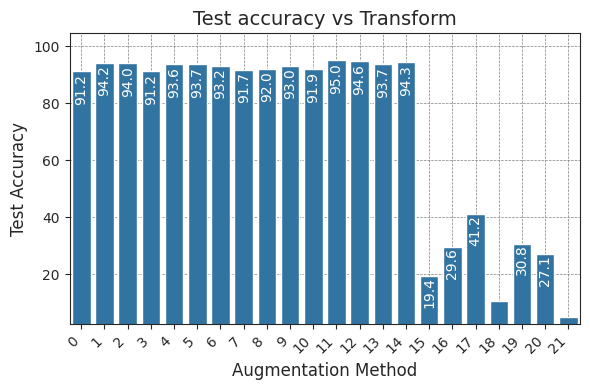

In [157]:
from adjustText import adjust_text
###
y_min = test_acc_df["test_acc"].min() * 0.5
#y_min=0
y_max = test_acc_df["test_acc"].max() * 1.1

# Set up the plot with improved styling
with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    plt.figure(figsize=(6, 4))
    
    # Create the bar plot
    ax = sns.barplot(x="aug", y="test_acc", data=test_acc_df)
    
    # Set title and axis labels with larger font sizes for readability
    plt.title("Test accuracy vs Transform", fontsize=14)
    plt.xlabel("Augmentation Method", fontsize=12)
    plt.ylabel("Test Accuracy", fontsize=12)
    
    # Adjust y-axis limits and add grid
    plt.ylim(y_min, y_max)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    
    # Improve tick parameters for clarity in a paper
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add text labels inside each bar
    for p in ax.patches:
                if p.get_height()>12:
                    value = f"{p.get_height():.1f}"  # Format value to 2 decimal places
                    x_position = p.get_x() + p.get_width() / 2  # Center text horizontally
                    y_position = p.get_height() * 0.99  # Position text at middle of each bar
                    ax.text(x_position, y_position, value, ha="center", va="top", 
                            fontsize=10, color="white", rotation=90)  # White text for visibility inside bars

    # Display the plot
    plt.tight_layout()  # Ensures everything fits without overlap

    plt.savefig(f"../zcost_proxies/results/augs/test_accuracy_{dataset}.png", format="png", dpi=300)  # Save as PNG
    plt.savefig(f"../zcost_proxies/results/augs/test_accuracy_{dataset}.svg", format="svg") 
    plt.show()    


In [142]:
dataset

'mateo'

In [39]:
datasets=list(aug_dfs.keys())

In [40]:
total_df_test=[]
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    df_test_acc=aug_dfs[dataset][["aug","test_acc"]].set_index("aug")
    #best_score=df_test_acc.loc[0, "test_acc"]
    #df_test_acc=df_test_acc/best_score
    df_test_acc["rank"]=df_test_acc.rank(ascending=False)
    total_df_test.append(df_test_acc)

In [41]:
total_df_test=pd.concat(total_df_test).reset_index()

In [42]:
total_df_test["rank"]=total_df_test["rank"].astype(int)
total_df_test.aug=total_df_test.aug.astype(str)


In [43]:
mean_rank_df = total_df_test.groupby('aug')['rank'].mean().sort_values()
# Sort the original DataFrame based on the order of the mean rank values
total_df_test = total_df_test.set_index('aug').loc[mean_rank_df.index].reset_index()

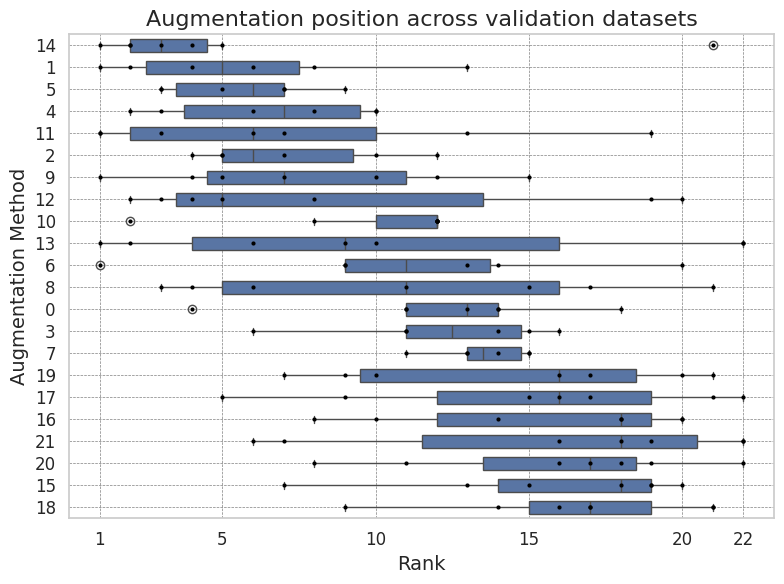

In [215]:
with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 6))

    # Create the box plot with enhanced style
    ax = sns.boxplot(data=total_df_test, x="rank", y="aug", orient="h", width=0.6)  #, palette="Set2"

    # Add individual data points to the plot
    sns.stripplot(data=total_df_test, x="rank", y="aug", orient="h", 
                  color="black", jitter=0, size=3, ax=ax)

    # Title and axis labels with increased font sizes for readability
    plt.title("Augmentation position across validation datasets", fontsize=16)
    plt.xlabel("Rank", fontsize=14)
    plt.ylabel("Augmentation Method", fontsize=14)

    # Customize grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

    # Set specific xticks at desired positions
    plt.xticks(ticks=[1, 5, 10, 15, 20, 22], fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust x-axis limits
    plt.xlim(0, 23)

    # Final adjustments
    plt.tight_layout()
    plt.savefig(f"../zcost_proxies/results/augs/mean_ranking_datasets.png", format="png", dpi=300)  # Save as PNG
    plt.savefig(f"../zcost_proxies/results/augs/mean_ranking_datasets.svg", format="svg") 
    plt.show()


In [44]:
total_df_test=total_df_test.reset_index()

In [45]:
total_df_test

index aug   test_acc  rank
0        0  14  94.290000     3
1        1  14  70.180000     1
2        2  14  61.501150     2
3        3  14  77.335000    21
4        4  14  93.870000     4
..     ...  ..        ...   ...
142    142  18  56.855686     9
143    143  18  82.550000    14
144    144  18  61.060000    21
145    145  18  65.763913    17
146    146  18  42.933333    17

[147 rows x 4 columns]

In [46]:
total_df_test=pd.concat(total_df_test).reset_index().groupby("aug").mean().sort_values(by="rank",ascending=True)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [147]:
total_df_test

test_acc       rank
aug                      
14   72.375155   5.875000
1    72.808721   6.285714
5    70.741487   6.428571
11   71.481222   7.250000
9    72.031600   7.312500
4    69.897505   7.428571
12   71.834454   8.000000
2    68.302798   9.000000
13   70.924651   9.875000
10   65.928120  10.250000
8    70.949015  10.250000
6    66.044812  12.142857
0    64.258582  12.875000
3    66.266716  13.428571
21   50.796751  13.875000
19   50.831225  14.312500
18   50.701616  14.625000
20   49.640684  14.625000
7    65.282334  14.714286
17   49.595933  15.125000
16   47.684850  15.625000
15   47.444600  15.750000

In [148]:
total_df_test

test_acc       rank
aug                      
14   72.375155   5.875000
1    72.808721   6.285714
5    70.741487   6.428571
11   71.481222   7.250000
9    72.031600   7.312500
4    69.897505   7.428571
12   71.834454   8.000000
2    68.302798   9.000000
13   70.924651   9.875000
10   65.928120  10.250000
8    70.949015  10.250000
6    66.044812  12.142857
0    64.258582  12.875000
3    66.266716  13.428571
21   50.796751  13.875000
19   50.831225  14.312500
18   50.701616  14.625000
20   49.640684  14.625000
7    65.282334  14.714286
17   49.595933  15.125000
16   47.684850  15.625000
15   47.444600  15.750000

In [154]:
#fig.write_image(f"zcost_proxies/results/augs/mean_ranking_datasets.png",format="png")
#fig.write_image(f"zcost_proxies/results/augs/mean_ranking_datasets.svg",format="svg")

In [10]:
#fig.write_image(f"zcost_proxies/results/augs/mean_ranking_proxies_datasets.png",format="png")
#fig.write_image(f"zcost_proxies/results/augs/mean_ranking_proxies_datasets.svg",format="svg")

In [251]:
dataset="sokoto"

In [60]:
rank_pos_dict={}
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].rank_proxy==1].rank_acc.values[0]
    #rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].aug==0].rank_acc.values[0]
rank_pos=pd.DataFrame([rank_pos_dict]).T.rename(columns={0:"Rank position"}).reset_index()
rank_pos["Rank position"]=rank_pos["Rank position"].astype(int)
rank_pos["method"]="Zero-cost proxies"

rank_pos_dict={}
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].aug==0].rank_acc.values[0]
rank_pos_a0=pd.DataFrame([rank_pos_dict]).T.rename(columns={0:"Rank position"}).reset_index()
rank_pos_a0["Rank position"]=rank_pos_a0["Rank position"].astype(int)
rank_pos_a0["method"]="No augmentation"

rank_pos_dict={}
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].aug==14].rank_acc.values[0]
rank_pos_a14=pd.DataFrame([rank_pos_dict]).T.rename(columns={0:"Rank position"}).reset_index()
rank_pos_a14["Rank position"]=rank_pos_a14["Rank position"].astype(int)
rank_pos_a14["method"]="Augmentation 14"

rank_pos_dict={}
for dataset in ["adaline","caitie","chester","lamelo","mateo", "sadie", "gutenberg"]:
    try:
        rank_pos_dict[dataset]=aug_dfs[dataset][aug_dfs[dataset].aug==1].rank_acc.values[0]
    except:
        print(dataset)
rank_pos_rand=pd.DataFrame([rank_pos_dict]).T.rename(columns={0:"Rank position"}).reset_index()
rank_pos_rand["Rank position"]=rank_pos_rand["Rank position"].astype(int)
rank_pos_rand["method"]="RandAugment"

chester


In [61]:
total_df_test=pd.concat([rank_pos,rank_pos_a0,rank_pos_a14,rank_pos_rand])[["method","Rank position"]]

In [62]:
mean_rank_df = total_df_test.groupby('method')['Rank position'].mean().sort_values()
# Sort the original DataFrame based on the order of the mean rank values
total_df_test = total_df_test.set_index('method').loc[mean_rank_df.index].reset_index()

In [63]:
mean_rank_df

method
Augmentation 14       5.428571
Zero-cost proxies     5.428571
RandAugment           5.666667
No augmentation      12.142857
Name: Rank position, dtype: float64

In [64]:
total_df_test

method  Rank position
0     Augmentation 14              3
1     Augmentation 14              1
2     Augmentation 14              2
3     Augmentation 14             21
4     Augmentation 14              4
5     Augmentation 14              5
6     Augmentation 14              2
7   Zero-cost proxies              8
8   Zero-cost proxies              9
9   Zero-cost proxies              6
10  Zero-cost proxies              3
11  Zero-cost proxies              6
12  Zero-cost proxies              1
13  Zero-cost proxies              5
14        RandAugment              4
15        RandAugment              8
16        RandAugment             13
17        RandAugment              2
18        RandAugment              6
19        RandAugment              1
20    No augmentation             14
21    No augmentation             14
22    No augmentation             11
23    No augmentation              4
24    No augmentation             11
25    No augmentation             13
26    No augmentation             18

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

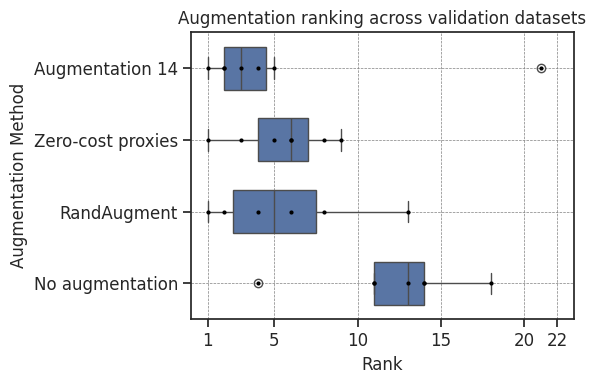

In [66]:
with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    #sns.set_theme(style="whitegrid")
    plt.figure(figsize=(6, 4))

    # Create the box plot with enhanced style
    ax = sns.boxplot(data=total_df_test, x="Rank position", y="method", orient="h", width=0.6)  #, palette="Set2"

    # Add individual data points to the plot
    sns.stripplot(data=total_df_test, x="Rank position", y="method", orient="h", 
                  color="black", jitter=0, size=3, ax=ax)

    # Title and axis labels with increased font sizes for readability
    plt.title("Augmentation ranking across validation datasets")
    plt.xlabel("Rank")
    plt.ylabel("Augmentation Method")

    # Customize grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

    # Set specific xticks at desired positions
    plt.xticks(ticks=[1, 5, 10, 15, 20, 22])
    plt.yticks(fontsize=12)

    # Adjust x-axis limits
    plt.xlim(0, 23)

    # Final adjustments
    plt.tight_layout()
    plt.savefig(f"../zcost_proxies/results/augs/real_ranking_datasets.png", format="png", dpi=300)  # Save as PNG
    plt.savefig(f"../zcost_proxies/results/augs/real_ranking_datasets.svg", format="svg") 
    plt.show()


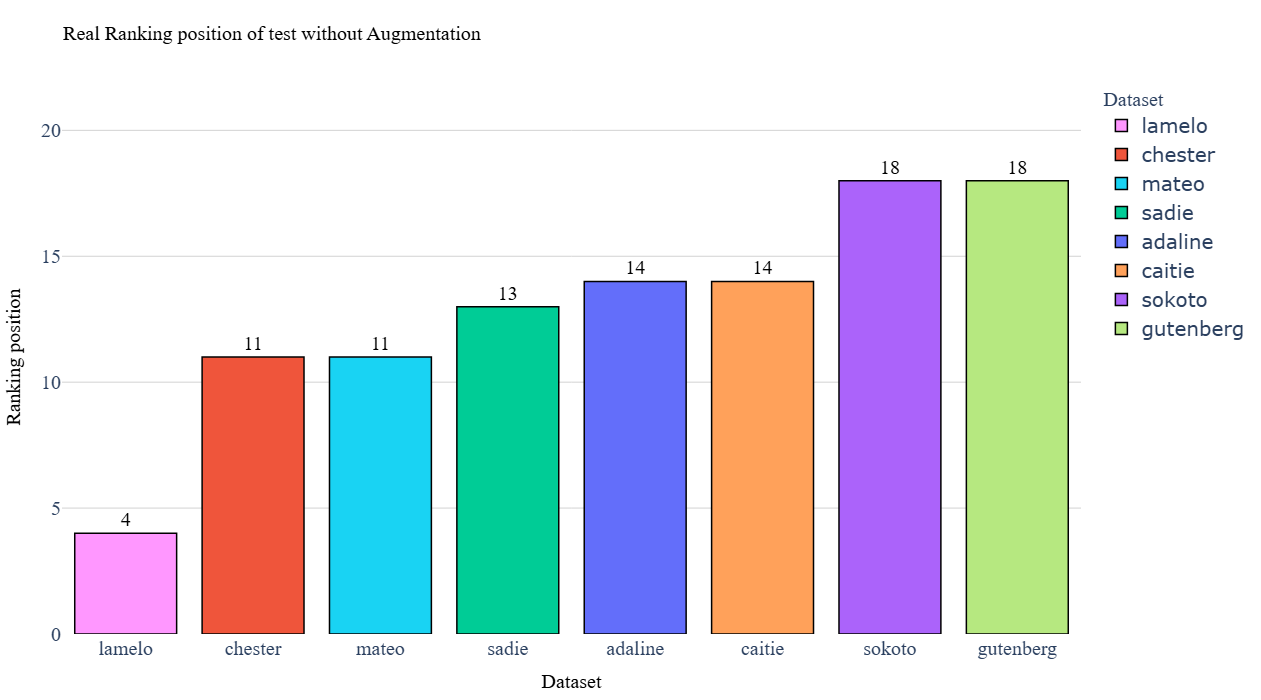

In [176]:
import plotly.express as px
color_map = {
    'adaline': '#636EFA',  # Blue
    'chester': '#EF553B',  # Red
    'sadie': '#00CC96',  # Green
    'sokoto': '#AB63FA',  # Purple
    'caitie': '#FFA15A',  # Orange
    'mateo': '#19D3F3',  # Cyan
    "gutenberg": "#B6E880",
    "lamelo": "#FF97FF",
    "Bonsai-Net": "#FFA07A",
    "BestCompetition": "#FECB52"
    #'T7_0': '#FF6692'   # Pink
}
fig = px.bar(rank_pos.sort_values(by="Rank position",ascending=True),#[total_sum_time_df["index"]!="T7_0"], 
             x="index", 
             y='Rank position', 
             text="Rank position",  # Display the score values on the bars
             color="index",  # Color by the index for distinction
            color_discrete_map=color_map,
             title='Real Ranking position of test without Augmentation')  # Add a meaningful title

# Customizing the layout for a more professional look
fig.update_layout(
    height=700,  # Increase the height
    width=900,  # Adjust the width
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis_title='Dataset',  # X-axis label
    yaxis_title='Ranking position',  # Y-axis label
    xaxis_title_font=dict(size=20, family='Montserrat', color='black'),  # X-axis title font
    yaxis_title_font=dict(size=20, family='Montserrat', color='black'),  # Y-axis title font
    xaxis_tickfont=dict(size=20, family='Montserrat'),  # X-axis tick labels font
    yaxis_tickfont=dict(size=20, family='Montserrat'),  # Y-axis tick labels font
    legend_title_text='Dataset',  # Legend title
    legend_title_font=dict(size=20, family='Montserrat'),  # Legend title font
    legend_font=dict(size=20),  # Legend labels font
    plot_bgcolor='white',  # Background color
    margin=dict(l=40, r=40, t=80, b=40),  # Margins around the plot
    yaxis=dict(gridcolor='lightgrey', range=[0,22])#, range=[0,8])  # Add light gridlines for better readability
    
)
fig.update_traces(textfont=dict(size=20, family='Montserrat', color='black'))
#fig.update_yaxes(range=[10, 22], row=row, col=col)

# Add gridlines and adjust bar text size
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the updated plot
fig.show()

In [177]:
fig.write_image(f"zcost_proxies/results/augs/noaug_real_ranking.png",format="png")
fig.write_image(f"zcost_proxies/results/augs/noaug_real_ranking.svg",format="svg")

# Population initilization Regressors plots

In [7]:
import pandas as pd
corr_dfs={
    "Epoch 5":[0.11, 0.38, 0.68, 0.56, 0.6, 0.49, 0.7],
    "Epoch 10":[0.27, 0.38, 0.79, 0.61, 0.67, 0.46, 0.75],
    #"Epoch 15":[0.54, 0.46, 0.81, 0.67, 0.69, 0.44, -0.11],
    "Epoch 20": [0.75, 0.62, 0.87, 0.78, 0.77, 0.51,  0.87],
    "RandomForest": [0.58, 0.2, 0.8, 0.82, 0.88, 0.88, 0.89],
    "SGD": [ 0.51, 0.18, 0.91, 0.82, 0.9, 0.85, 0.86]
}
#Dataset, Caitie, Chester, Gutenberg, LaMelo, Mateo, Sadie, Adaline

In [8]:
corrs_df=pd.DataFrame(corr_dfs).T

In [9]:
corrs_df.columns=["Caitie", "Chester", "Gutenberg", "LaMelo", "Mateo", "Sadie", "Adaline"]
#corrs_df=corrs_df.T

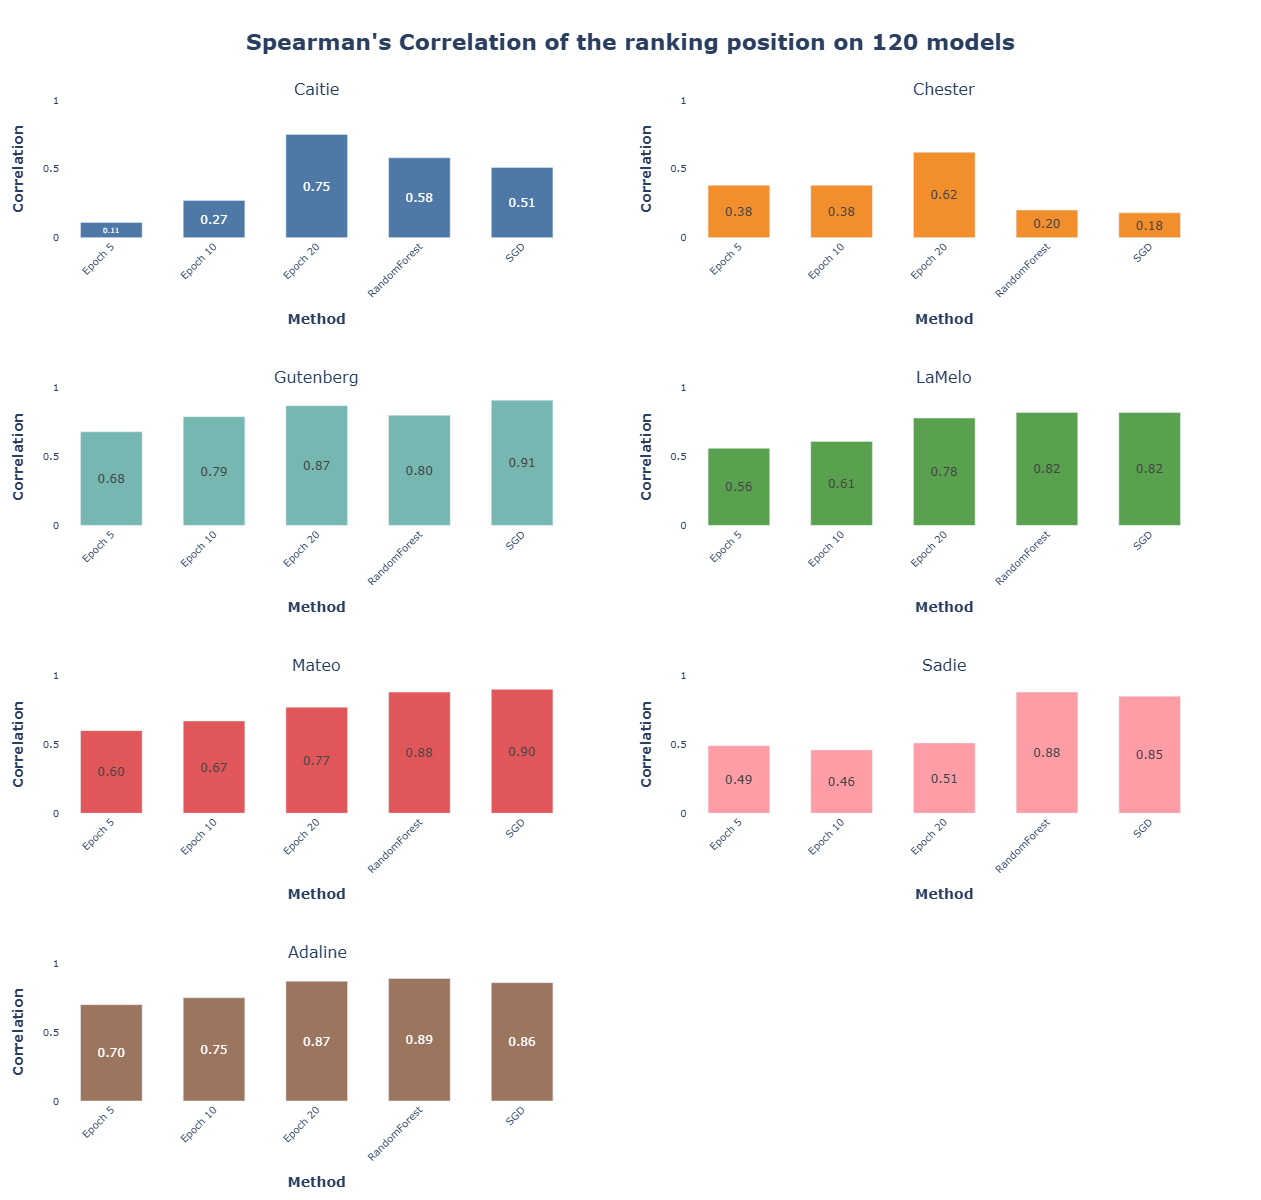

In [13]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots with a 4x2 grid
fig = sp.make_subplots(
    rows=4, cols=2, 
    subplot_titles=corrs_df.columns,
    horizontal_spacing=0.10,  # Add spacing between subplots
    vertical_spacing=0.15
)

# Defining a refined color palette for the bars
colors = ['#4E79A7', '#F28E2B', '#76B7B2', '#59A14F', '#E15759', '#FF9DA7', '#9C755F', '#EDC948']

# Adding traces for each column and displaying the scores inside each bar
for i, column in enumerate(corrs_df.columns):
    row = i // 2 + 1  # Adjust row based on 4 rows and 2 columns layout
    col = i % 2 + 1   # Adjust column based on 2 columns
    fig.add_trace(
        go.Bar(
            x=corrs_df.index, 
            y=corrs_df[column], 
            name=column, 
            marker_color=colors[i % len(colors)],  # Cycle through colors
            showlegend=False,  # Hide individual legends
            text=corrs_df[column],  # Display the score values
            textposition='inside',  # Position the text inside the bars
            texttemplate='%{text:.2f}',  # Format the text to 2 decimal places
            insidetextanchor='middle',  # Center the text within the bars
            width=0.6  # Adjust bar width to avoid clutter
        ),
        row=row, col=col
    )

# Fix the y-axis range between -0.5 and 0.8 for all subplots
for i, column in enumerate(corrs_df.columns):
    row = i // 2 + 1  # Adjust row
    col = i % 2 + 1   # Adjust column
    fig.update_yaxes(range=[0.0, 1.0], row=row, col=col)

# Update layout with professional design elements
fig.update_layout(
    height=1200,  # Increase height for better visualization
    width=800,  # Adjust width for 2-column layout
    title_text="<b>Spearman's Correlation of the ranking position on 120 models</b>",  # Make title bold
    title_font_size=22,  # Increase title font size
    title_x=0.5,  # Center the title
    font=dict(size=12),  # Adjust font size for axis labels and tick marks
    margin=dict(t=100, b=40, l=60, r=60),  # Adjust margins for balanced spacing
    paper_bgcolor='white',  # Set a clean white background
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
)

# Customize the axis titles and tick labels for better readability
fig.update_xaxes(title_text="<b>Method</b>", tickangle=-45, tickfont=dict(size=10))
fig.update_yaxes(title_text="<b>Correlation</b>", tickfont=dict(size=10))

# Show plot
fig.show()


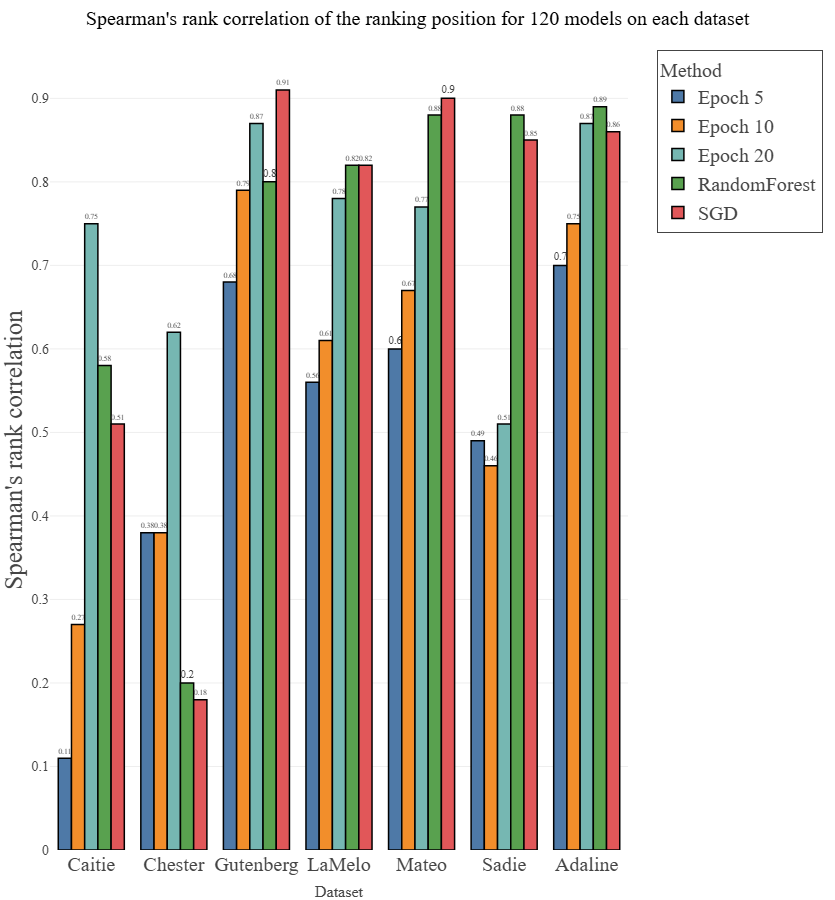

In [31]:
import plotly.graph_objects as go
fig = go.Figure()

# Define colors for each column for better visual differentiation
colors = ['#4E79A7', '#F28E2B', '#76B7B2', '#59A14F', '#E15759']  # Professional, distinguishable color scheme

color_map = {
    'T7_0': '#636EFA',  # Blue
    'T0_5': '#EF553B',  # Red
    'T1_5': '#00CC96',  # Green
    'T2_5': '#AB63FA',  # Purple
    'T4_5': '#FFA15A',  # Orange
    'T6_5': '#19D3F3',  # Cyan
    "ResNext": "#B6E880",
    "ResNet-18": "#FF97FF",
    "Bonsai-Net": "#FFA07A",
    "BestCompetition": "#FECB52"
    #'T7_0': '#FF6692'   # Pink
}

# Add bars for each column with scientific formatting
for i, col in enumerate(corrs_df.columns):
    fig.add_trace(go.Bar(
        x=corrs_df.index,
        y=corrs_df[col],
        name=col,  # Each bar group named after the column
        marker_color=colors[i],  # Set the custom color for each bar group
        text=corrs_df[col].round(2),  # Display the values as text on the bars
        textposition='outside',  # Position the text outside the bars
        textfont=dict(size=20, family='Times New Roman'),  # Customize the text font
    ))

# Update the layout for a clean, professional look with legend on the right side
fig.update_layout(
    title="Spearman's rank correlation of the ranking position for 120 models on each dataset",  # Title of the plot
    title_font=dict(size=20, family='Montserrat', color='black'),  # Title font
    xaxis=dict(
        title="Dataset",  # X-axis label
        tickmode='linear',
        tickfont=dict(family='Times New Roman', size=20),
        title_font=dict(size=16, family='Times New Roman'),
        showgrid=False  # Remove grid for a cleaner look
    ),
    yaxis=dict(
        title="Spearman's rank correlation",  # Y-axis label
        title_font=dict(size=25, family='Times New Roman'),
        tickfont=dict(family='Times New Roman', size=14),
        showgrid=True,  # Optional: gridlines for y-axis to aid interpretation
        zeroline=False  # Remove the default zero line for clarity
    ),
    barmode='group',  # Grouped bars for better comparison
    font=dict(family='Times New Roman', size=14),  # Set the overall font for the figure
    legend=dict(
        title="Method",  # Legend title
        title_font=dict(family='Times New Roman', size=20),
        font=dict(family='Times New Roman', size=20),
        x=1.05,  # Move the legend to the right of the plot
        y=1,  # Keep the legend at the top
        xanchor="left",  # Anchor the legend to the left of its position
        borderwidth=1,  # Optional: Add a border around the legend for clarity
    ),
    margin=dict(l=50, r=100, t=50, b=50),  # Increase right margin to accommodate the legend
    width=1200,  # Set figure width
    height=900,  # Set figure height
    template="presentation",
    plot_bgcolor='white',  # Background color

)
fig.update_traces(
    texttemplate='%{text}',  # Format the bar labels to 2 decimal places
    textposition='outside',  # Position the labels outside the bars
    marker_line_width=1.5,  # Add a border around the bars
    marker_line_color='black'  # Border color for the bars
)

# Show the plot
fig.show()

In [14]:
#fig.write_image(f"regressors/spearman_corr_v2.png",format="PNG")
#fig.write_image(f"regressors/spearman_corr_v2.svg",format="SVG")

# Knowledge sharing and inheritance

In [2]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [5]:
import pandas as pd

# List of dataset names
datasets = ["Gutenberg", "Mateo", "Chester", "Adaline", "LaMelo", "Caitie", "Sadie"]

# Initialize an empty dictionary to store DataFrames
data_dict = {}

# Load each dataset into the dictionary
for dataset in datasets:
    path = f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/{dataset}"
    df = get_predictor_data(studies=[path]).sort_values("name").set_index("name")
    
    # Apply any dataset-specific adjustments
    #if dataset == "Caitie":
    #    df = df.iloc[:-1, :]
    
    # Store in dictionary with dataset name as the key
    data_dict[dataset] = df

# Now you can access each DataFrame like this: data_dict["LaMelo"]


['active_sawfish', 'alluring_bulldog', 'almond_anaconda', 'ambitious_silkworm', 'analytic_seriema', 'annoying_numbat', 'artichoke_tarsier', 'asparagus_doberman', 'astute_deer', 'attentive_rottweiler', 'blazing_jaguarundi', 'blazing_mustang', 'bold_grebe', 'brawny_echidna', 'bright_nuthatch', 'bulky_wombat', 'capable_python', 'caped_stallion', 'charcoal_dormouse', 'charming_sambar', 'chirpy_rook', 'classy_vole', 'conscious_goose', 'cornflower_toucan', 'curly_guillemot', 'dashing_raven', 'dazzling_tapir', 'deft_manul', 'delicate_heron', 'denim_wrasse', 'didactic_kittiwake', 'discreet_poodle', 'divergent_goose', 'enchanted_narwhal', 'enchanted_shellfish', 'fabulous_caribou', 'fantastic_crocodile', 'fast_sawfish', 'fervent_booby', 'flat_barnacle', 'fragrant_mouflon', 'gorgeous_turaco', 'greedy_avocet', 'groovy_narwhal', 'heavenly_dormouse', 'hilarious_rabbit', 'holistic_bird', 'hopeful_elephant', 'horned_caiman', 'hot_prawn', 'huge_kagu', 'huge_urchin', 'humongous_cobra', 'hypnotic_cobra',

In [7]:
import pandas as pd

# Dictionary of datasets and their specific paths
dataset_paths = {
    "Gutenberg": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_10_59/Gutenberg",
    "Chester": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_10/Chester",
    "Adaline": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_11/Adaline",
    "LaMelo": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_13/LaMelo",
    "Mateo": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_13/Mateo",
    "Caitie": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_15_27/Caitie",
    "Sadie": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_22_07/Sadie"
}

# Dictionary to store DataFrames
data_dict_no_stem = {}

# Load each dataset into the dictionary
for dataset, path in dataset_paths.items():
    df = get_predictor_data(studies=[path]).sort_values("name").set_index("name")
    
    # Remove last row if dataset is "Caitie"
    #if dataset == "Caitie":
    #    df = df.iloc[:-1, :]
    
    data_dict_no_stem[dataset] = df

# Optional: Align indices with `train_data`
for dataset, df in data_dict_no_stem.items():
    train_data=data_dict[dataset]
    if len(df) < len(train_data):
        valid_indices = train_data.index.intersection(df.index)
        data_dict_no_stem[dataset] = df.loc[valid_indices]
        train_data = train_data.loc[valid_indices]
    else:
        data_dict_no_stem[dataset] = df.loc[train_data.index]

# Now you can access each DataFrame in data_dict with the dataset name as the key


['active_sawfish', 'alluring_bulldog', 'almond_anaconda', 'ambitious_silkworm', 'analytic_seriema', 'annoying_numbat', 'artichoke_tarsier', 'asparagus_doberman', 'astute_deer', 'attentive_rottweiler', 'blazing_jaguarundi', 'blazing_mustang', 'bold_grebe', 'brawny_echidna', 'bright_nuthatch', 'bulky_wombat', 'capable_python', 'caped_stallion', 'charcoal_dormouse', 'charming_sambar', 'chirpy_rook', 'classy_vole', 'conscious_goose', 'cornflower_toucan', 'curly_guillemot', 'dashing_raven', 'dazzling_tapir', 'deft_manul', 'delicate_heron', 'denim_wrasse', 'didactic_kittiwake', 'discreet_poodle', 'divergent_goose', 'enchanted_narwhal', 'enchanted_shellfish', 'fabulous_caribou', 'fantastic_crocodile', 'fast_sawfish', 'fervent_booby', 'flat_barnacle', 'fragrant_mouflon', 'gorgeous_turaco', 'greedy_avocet', 'groovy_narwhal', 'heavenly_dormouse', 'hilarious_rabbit', 'holistic_bird', 'hopeful_elephant', 'horned_caiman', 'hot_prawn', 'huge_kagu', 'huge_urchin', 'humongous_cobra', 'hypnotic_cobra',

In [84]:
import pandas as pd


dataset_paths = {
    "Gutenberg":"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/28_08_2024_23_20/Gutenberg",
    "Chester": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_00/Chester",
    "Adaline": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_07/Adaline",
    "LaMelo": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_20/LaMelo",
    "Mateo": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_28/Mateo",
    "Caitie": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/28_08_2024_14_46/Caitie",
    "Sadie": "/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/28_08_2024_21_58/Sadie"
}

# Dictionary to store DataFrames
data_dict_stem = {}

# Load each dataset into the dictionary
for dataset, path in dataset_paths.items():
    df = get_predictor_data(studies=[path]).sort_values("name").set_index("name")
    
    # Remove last row if dataset is "Caitie"
    #if dataset == "Caitie":
    #    df = df.iloc[:-1, :]
    
    data_dict_stem[dataset] = df

# Optional: Align indices with `train_data`
for dataset, df in data_dict_stem.items():
    train_data=data_dict[dataset]
    if len(df) < len(train_data):
        valid_indices = train_data.index.intersection(df.index)
        data_dict_stem[dataset] = df.loc[valid_indices]
        train_data = train_data.loc[valid_indices]
    else:
        data_dict_stem[dataset] = df.loc[train_data.index]

# Now you can access each DataFrame in data_dict with the dataset name as the key


['active_sawfish', 'alluring_bulldog', 'almond_anaconda', 'ambitious_silkworm', 'analytic_seriema', 'annoying_numbat', 'artichoke_tarsier', 'asparagus_doberman', 'astute_deer', 'attentive_rottweiler', 'blazing_jaguarundi', 'blazing_mustang', 'bold_grebe', 'brawny_echidna', 'bright_nuthatch', 'bulky_wombat', 'capable_python', 'caped_stallion', 'charcoal_dormouse', 'charming_sambar', 'chirpy_rook', 'classy_vole', 'conscious_goose', 'cornflower_toucan', 'curly_guillemot', 'dashing_raven', 'dazzling_tapir', 'deft_manul', 'delicate_heron', 'denim_wrasse', 'didactic_kittiwake', 'discreet_poodle', 'divergent_goose', 'enchanted_narwhal', 'enchanted_shellfish', 'fabulous_caribou', 'fantastic_crocodile', 'fast_sawfish', 'fervent_booby', 'flat_barnacle', 'fragrant_mouflon', 'gorgeous_turaco', 'greedy_avocet', 'groovy_narwhal', 'heavenly_dormouse', 'hilarious_rabbit', 'holistic_bird', 'hopeful_elephant', 'horned_caiman', 'hot_prawn', 'huge_kagu', 'huge_urchin', 'humongous_cobra', 'hypnotic_cobra',

In [121]:
dataset="Sadie"
mode="stem"
train_data=data_dict[dataset]
train_data_dist=data_dict_no_stem[dataset] if mode=="no_stem" else data_dict_stem[dataset]

In [122]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

train_data_dist_cum= train_data_dist.cummax(axis=1)
train_data_dist_cum["best_acc"]=train_data_dist_cum.max(axis=1)
train_data_dist["best_acc"]=train_data_dist.max(axis=1)

In [123]:
mean_df=pd.DataFrame([train_data_cum.mean().reset_index(drop=True),train_data_dist_cum.mean().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:test_name})

In [124]:
min_q=0.0
#df_min=pd.DataFrame([train_data_cum.min().reset_index(drop=True),train_data_dist_cum.min().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min=pd.DataFrame([train_data_cum.quantile(min_q).reset_index(drop=True),train_data_dist_cum.quantile(min_q).reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min.columns=["vanilla",test_name]

In [125]:
max_q=1.0
#df_max=pd.DataFrame([train_data_cum.max().reset_index(drop=True),train_data_dist_cum.max().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max=pd.DataFrame([train_data_cum.quantile(max_q).reset_index(drop=True),train_data_dist_cum.quantile(max_q).reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max.columns=["vanilla",test_name]

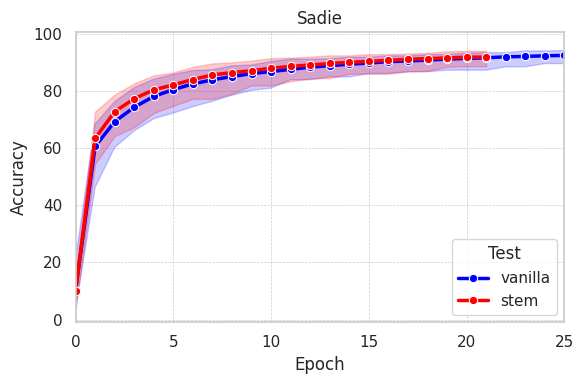

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

with paperStyle(font_size=12, use_seaborn=True, temporary=True, ticks='out'):
    #sns.set_theme(style="whitegrid")
    plt.figure(figsize=(6, 4))
    

    # Assuming 'mean_df', 'df_min', and 'df_max' are already defined DataFrames
    #plt.figure(figsize=(12, 6))

    sns.set_theme(style="whitegrid")

    # Create figure and axes with desired dimensions for papers
    #plt.figure(figsize=(8, 5))

    # Plot mean accuracy lines with markers
    sns.lineplot(data=mean_df, x=mean_df.index, y='vanilla', label='vanilla', marker='o', linewidth=2.5, color='blue')
    sns.lineplot(data=mean_df, x=mean_df.index, y=test_name, label=mode, marker='o', linewidth=2.5, color='red')

    # Add fill_between for min-max range shadows around 'vanilla'
    plt.fill_between(
        mean_df.index, 
        df_min['vanilla'], 
        df_max['vanilla'], 
        color='blue', 
        alpha=0.2
    )

    # Add fill_between for min-max range shadows around the test_name line
    plt.fill_between(
        mean_df.index, 
        df_min[test_name], 
        df_max[test_name], 
        color='red', 
        alpha=0.2
    )

    # Set plot limits and ticks
    plt.xlim(0, 25)
    plt.xticks(ticks=range(0, 26, 5))
    plt.title(dataset)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Set the legend in the top right corner, showing only line labels
    plt.legend(title='Test', loc='lower right')

    # Adjust layout to ensure everything fits well for publication
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Show the plot
    #plt.savefig(f"kd_inheritance_plots/{dataset}/{mode}.svg", format="svg") 
    plt.show()

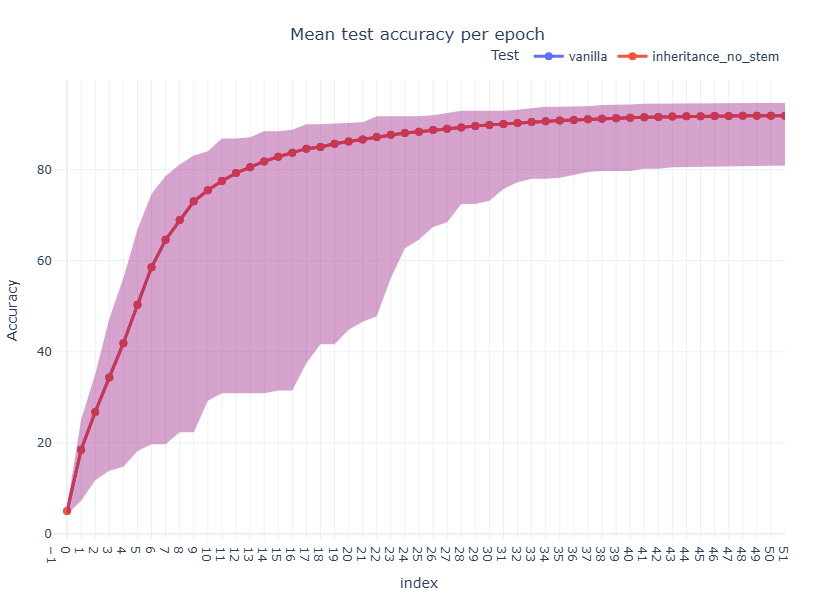

In [82]:
import plotly.express as px
import pandas as pd

# Assuming 'mean_df', 'df_min', and 'df_max' are your dataframes
fig = px.line(
    mean_df, 
    y=['vanilla', test_name], 
    title='Mean test accuracy per epoch',
    labels={"Value": "Accuracy"},
    markers=True,  # Add markers to the lines
    template="plotly_white", 
    width=1000, height=600
)

# Update trace settings for the main plot
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Adding min-max range shadows for 'vanilla'
#fig.add_traces([
#    px.line(mean_df, y='vanilla').data[0],  # Add the vanilla mean line
#    px.line(mean_df, y='inheritance').data[0]  # Add the inheritance mean line
#])

fig.add_traces([
    # Min-max shadows for 'vanilla'
    dict(
        x=mean_df.index, 
        y=df_min['vanilla'], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max['vanilla'], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(0, 0, 255, 0.2)',  # Light red for shadow
        showlegend=False
    ),
    
    # Min-max shadows for 'inheritance'
    dict(
        x=mean_df.index, 
        y=df_min[test_name], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max[test_name], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(255, 0, 0, 0.2)',  # Light blue for shadow
        showlegend=False
    )
])

# Update layout settings
fig.update_layout(
    title={'text': 'Mean test accuracy per epoch', 'x':0.5, 'xanchor': 'center'},
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    yaxis=dict(title="Accuracy"),
    legend=dict(title='Test', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()